# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러 옵니다
# 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화 합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정

In [2]:
# Google Colab  사용시 아래 주석을 풀고 폰트 설정을 합니다.
# 로컬 아나콘다 사용시에는 그대로 주석처리 해놓으시면 됩니다. 
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 Colab에서는 오류가 발생하니 아래에 있는 폰트 설정을 꼭 주석처리 할것
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font.manager as fm

# fontpath = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# colab의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [3]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져 보입니다
# 한글이 출력될수 있도록 폰트 설정을 해줍니다
# 운영체제별 설명을 위해 로드 합니다

import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어 옵니다
# 파일을 읽어 온 후 shape로 행과 열의 수를 출력합니다.

df = pd.read_csv("건강검진정보.csv", encoding="cp949")
df.shape

(389412, 34)

In [6]:
# sample, head, tail로 데이터 미리 보기를 합니다
# smaple 은 랜덤하게 하나의 샘플만 가져 온다 

df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
335505,2019,946094,11,1,15,165,55,78.0,1.5,1.2,...,8.0,1.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231


In [7]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,610589,11,2,11,150,50,68.0,1.0,1.0,...,29.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
1,2019,610590,42,1,9,175,85,90.0,1.0,1.2,...,35.0,2.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231
2,2019,610591,31,1,12,155,60,82.5,0.5,0.5,...,43.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
3,2019,610592,26,2,14,155,50,71.0,0.7,0.7,...,11.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,610593,26,2,14,155,50,76.0,0.9,0.8,...,9.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


# 기본정보 보기

In [8]:
# infor를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389412 entries, 0 to 389411
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   기준년도           389412 non-null  int64  
 1   가입자 일련번호       389412 non-null  int64  
 2   시도코드           389412 non-null  int64  
 3   성별코드           389412 non-null  int64  
 4   연령대 코드(5세단위)   389412 non-null  int64  
 5   신장(5Cm단위)      389412 non-null  int64  
 6   체중(5Kg 단위)     389412 non-null  int64  
 7   허리둘레           389245 non-null  float64
 8   시력(좌)          389330 non-null  float64
 9   시력(우)          389332 non-null  float64
 10  청력(좌)          389342 non-null  float64
 11  청력(우)          389343 non-null  float64
 12  수축기 혈압         387363 non-null  float64
 13  이완기 혈압         387362 non-null  float64
 14  식전혈당(공복혈당)     387334 non-null  float64
 15  총 콜레스테롤        129983 non-null  float64
 16  트리글리세라이드       129982 non-null  float64
 17  HDL 콜레스테롤      129981 non-nul

In [9]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다

df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [10]:
# dtypes 를 통해 데이터 형식만 출력합니다. 

df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

# 결측치 보기

In [11]:
# True == 1

In [12]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다 결측치 수를 세어줍니다

df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                167
시력(좌)                82
시력(우)                80
청력(좌)                70
청력(우)                69
수축기 혈압             2049
이완기 혈압             2050
식전혈당(공복혈당)         2078
총 콜레스테롤          259429
트리글리세라이드         259430
HDL 콜레스테롤        259431
LDL 콜레스테롤        261940
혈색소                2080
요단백                3923
혈청크레아티닌            2078
(혈청지오티)AST         2077
(혈청지오티)ALT         2078
감마 지티피             2078
흡연상태                 72
음주여부             138235
구강검진 수검여부             0
치아우식증유무          234286
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               234286
데이터 공개일자              0
dtype: int64

In [13]:
# isna 로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다

df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                167
시력(좌)                82
시력(우)                80
청력(좌)                70
청력(우)                69
수축기 혈압             2049
이완기 혈압             2050
식전혈당(공복혈당)         2078
총 콜레스테롤          259429
트리글리세라이드         259430
HDL 콜레스테롤        259431
LDL 콜레스테롤        261940
혈색소                2080
요단백                3923
혈청크레아티닌            2078
(혈청지오티)AST         2077
(혈청지오티)ALT         2078
감마 지티피             2078
흡연상태                 72
음주여부             138235
구강검진 수검여부             0
치아우식증유무          234286
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               234286
데이터 공개일자              0
dtype: int64

<AxesSubplot:>

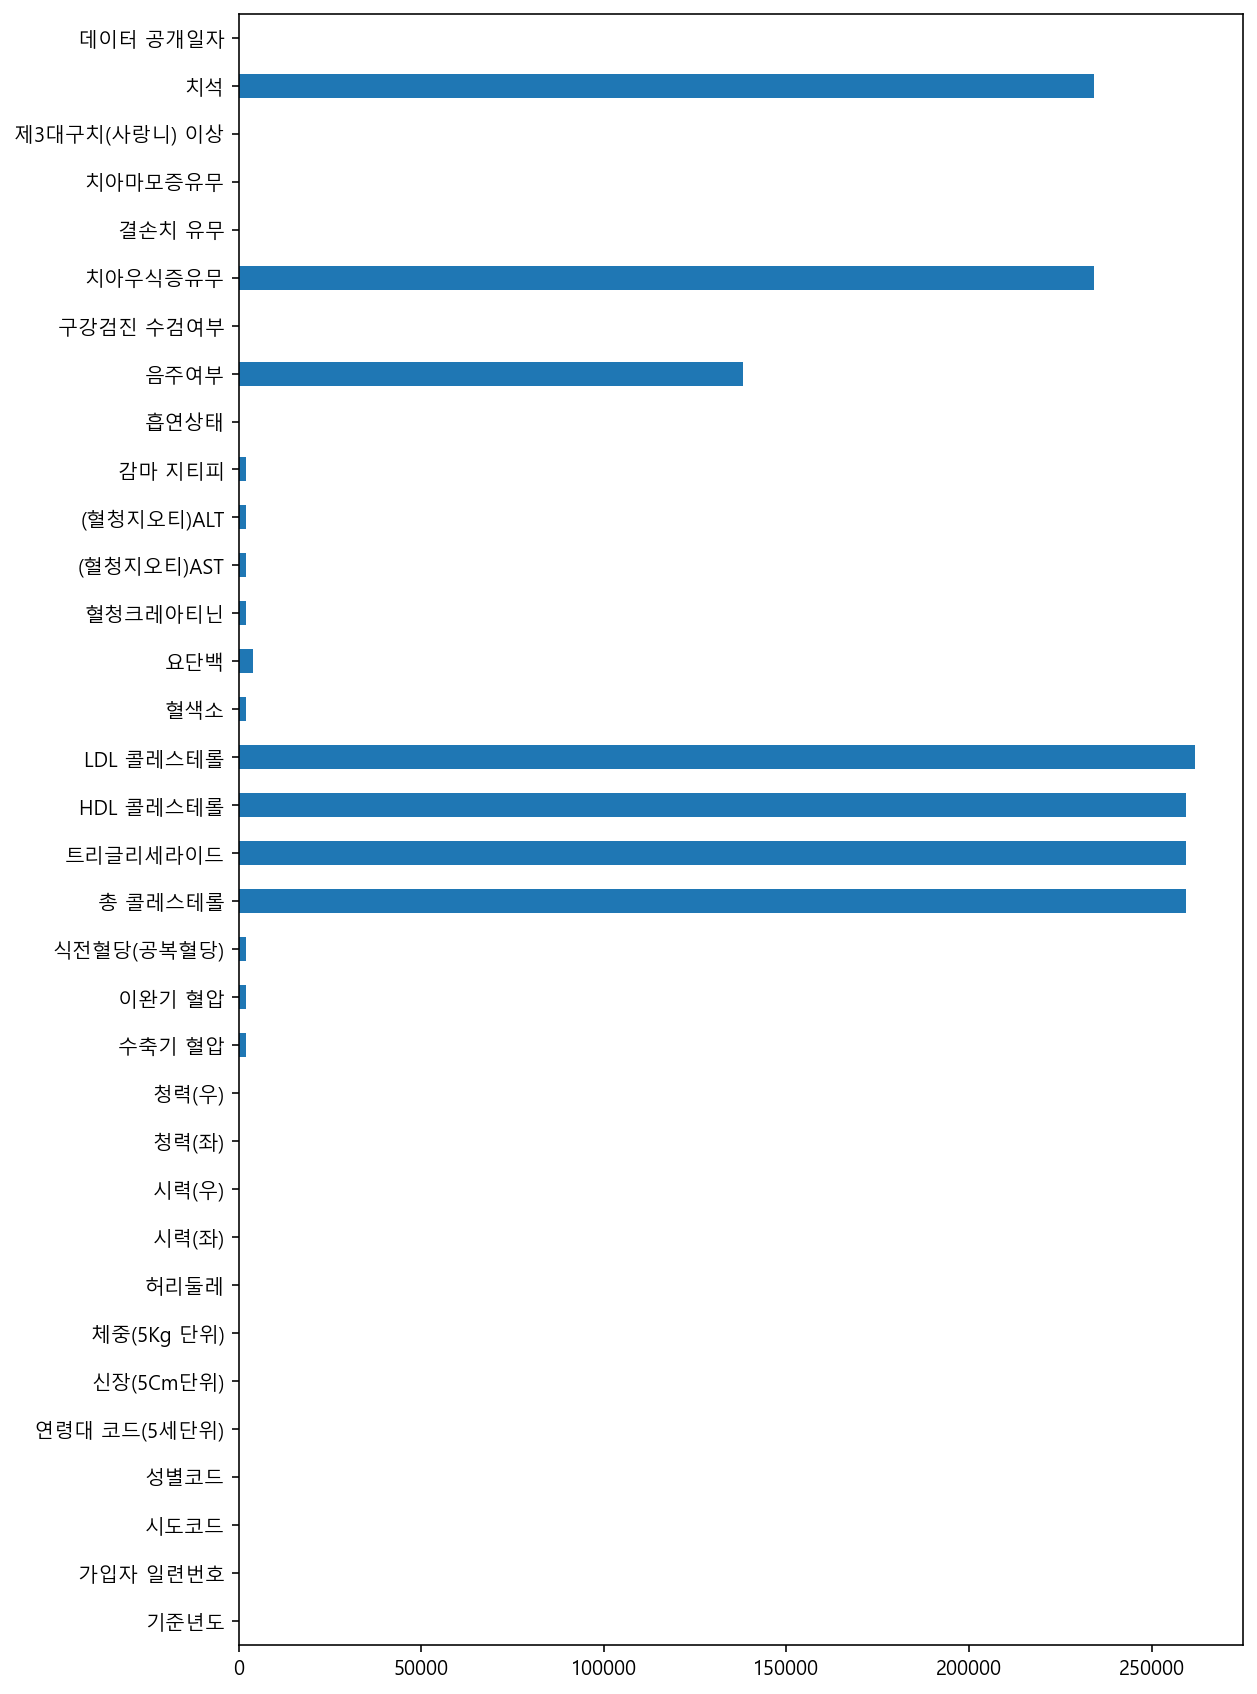

In [14]:
# 판다스에 내장된 plot을 통해 시각화를 합니다. 

df.isnull().sum().plot.barh(figsize=(9,15))

# 일부 데이터 요약하기

In [15]:
# 여러 컬럼을 가져옵니다
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다

# 리스트는 데이터프레임 형태로 가져온다
# 한 개 컬럼은 시리즈로 불러 온다 but 리스트를 취하면 데이터프레임으로 가져온다 
# 두 개 이상의 컬럼은 리스트로 불러와야 한다 

df[["(혈청지오티)ALT"]]

,(혈청지오티)ALT
0,24.0
1,32.0
2,28.0
3,12.0
4,14.0
...,...
389407,23.0
389408,15.0
389409,28.0
389410,65.0


In [16]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]]

,(혈청지오티)ALT,(혈청지오티)AST
0,24.0,30.0
1,32.0,27.0
2,28.0,31.0
3,12.0,22.0
4,14.0,18.0
...,...,...
389407,23.0,24.0
389408,15.0,16.0
389409,28.0,23.0
389410,65.0,25.0


In [17]:
# "(혈정지오티)ALT", "(혈정지오티)AST"를 요약합니다.  info  /  describe

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389412 entries, 0 to 389411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  387334 non-null  float64
 1   (혈청지오티)AST  387335 non-null  float64
dtypes: float64(2)
memory usage: 5.9 MB


,(혈청지오티)ALT,(혈청지오티)AST
count,387334.000000,387335.000000
mean,25.996750,26.217318
std,28.045243,23.142104
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,6948.000000


# value_counts로 값 집계하기

<AxesSubplot:>

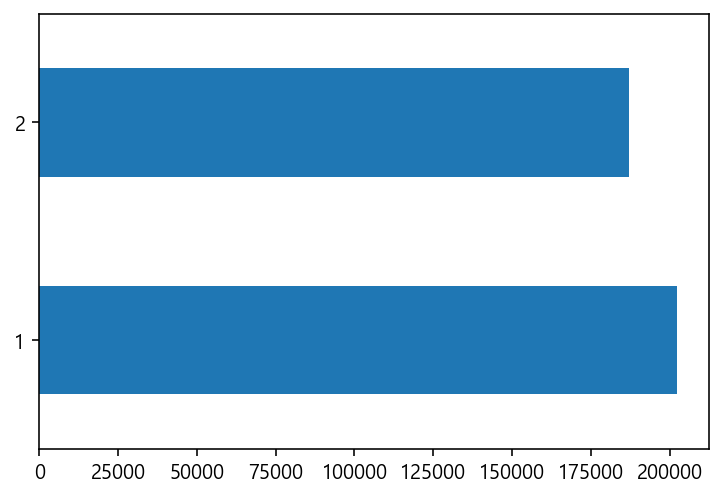

In [18]:
# value_counts를 통해 성별코드로 그룹화하고 개수를 집계합니다

df["성별코드"].value_counts().plot.barh()

In [19]:
# value_counts를 통해 흡연상태로 그룹화 하고 개수를 집계합니다. 

df["흡연상태"].value_counts()

1.0    245074
2.0    144266
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기

## groupby

In [20]:
# groupby를 통해 데이터를 그룹화 합니다
# 성별코드로 그룹화 한 데이터를 세어 봅니다

# 성별코드에 대해 모든 컬럼의 개수를 세어 준다
df.groupby(["성별코드"]).count()

# 성별코드에 대해 가입자 일련번호의 개수만 세어 준다
df.groupby(["성별코드"])["가입자 일련번호"].count()

성별코드
1    202392
2    187020
Name: 가입자 일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 개수를 세어봅니다

df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0          6
      1.0     156146
2     0.0          3
      1.0      95022
Name: 가입자 일련번호, dtype: int64

In [22]:
# 성별코드와 음주여부로 그룹화하고 감마지티피의 평균을 구합니다. 

df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

성별코드  음주여부
1     0.0     23.666667
      1.0     52.215706
2     0.0     14.333333
      1.0     23.444312
Name: 감마 지티피, dtype: float64

In [23]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다

df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

count       mean        std   min    25%   50%    75%    max
성별코드 음주여부                                                                 
1    0.0        6.0  23.666667  12.404300  10.0  17.75  20.5  26.25   46.0
     1.0   155856.0  52.215706  63.175364   2.0  22.00  34.0  58.00  999.0
2    0.0        3.0  14.333333   8.144528   5.0  11.50  18.0  19.00   20.0
     1.0    94850.0  23.444312  30.624439   1.0  13.00  16.0  24.00  999.0

In [24]:
# agg를 사용하면 원하는 여러 수치만 볼수 있다 

df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0        6  23.666667    20.5
     1.0   155856  52.215706    34.0
2    0.0        3  14.333333    18.0
     1.0    94850  23.444312    16.0

## pivot_table
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [25]:
# 음주여부에 따른 그룹화된 수를 피벗 테이블로 구합니다. 

df.pivot_table(index=["음주여부"], values=["가입자 일련번호"], aggfunc="count")

,가입자 일련번호
음주여부,
0.0,9
1.0,251168


In [26]:
# 음주여부에 따른 감마 지티피의 평균을 구합니다  (두가지 방법)

df.pivot_table(index="음주여부", values="감마 지티피", aggfunc="mean")

table = pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc="mean")
table

,감마 지티피
음주여부,
0.0,20.555556
1.0,41.330578


In [27]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있습니다. 

# 인덱스가 두 개 이상일때 np.median 안됨

df.pivot_table(index="음주여부", values="감마 지티피", aggfunc=np.median)

,감마 지티피
음주여부,
0.0,20.0
1.0,26.0


In [28]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다 

df.pivot_table(index="음주여부", values="감마 지티피", aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,20.555556,20.0
1.0,41.330578,26.0


In [29]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다 

df.pivot_table(index="음주여부", values="감마 지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,17.0,20.0,21.0,9.0,46.0,20.555556,5.0,11.598611
1.0,17.0,26.0,45.0,250706.0,999.0,41.330578,1.0,55.051473


In [30]:
# 성별코드, 음주여부에 따른 감마 지티피 값의 평균을 구합니다

table = pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마 지티피", aggfunc="mean")
table

감마 지티피
성별코드 음주여부           
1    0.0   23.666667
     1.0   52.215706
2    0.0   14.333333
     1.0   23.444312

# 전체 데이터 시각화 하기
100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다
100만개가 넘는 데이터를 seaborn과 같은 고급 통계연산을 하는 그래프를 사용하면 많이 느릴 수 있습니다.

## 히스토그램
판다스의 info 기능을 통해 대부분 수치 데이터로 이루어진 것을 확인할 수 있었습니다
히스토그램을 사용하면 수치데이터를 bin의 개수만큽 그룹화해서 도수분포표를 만들고 그 결과를 시각화 합니다
이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다

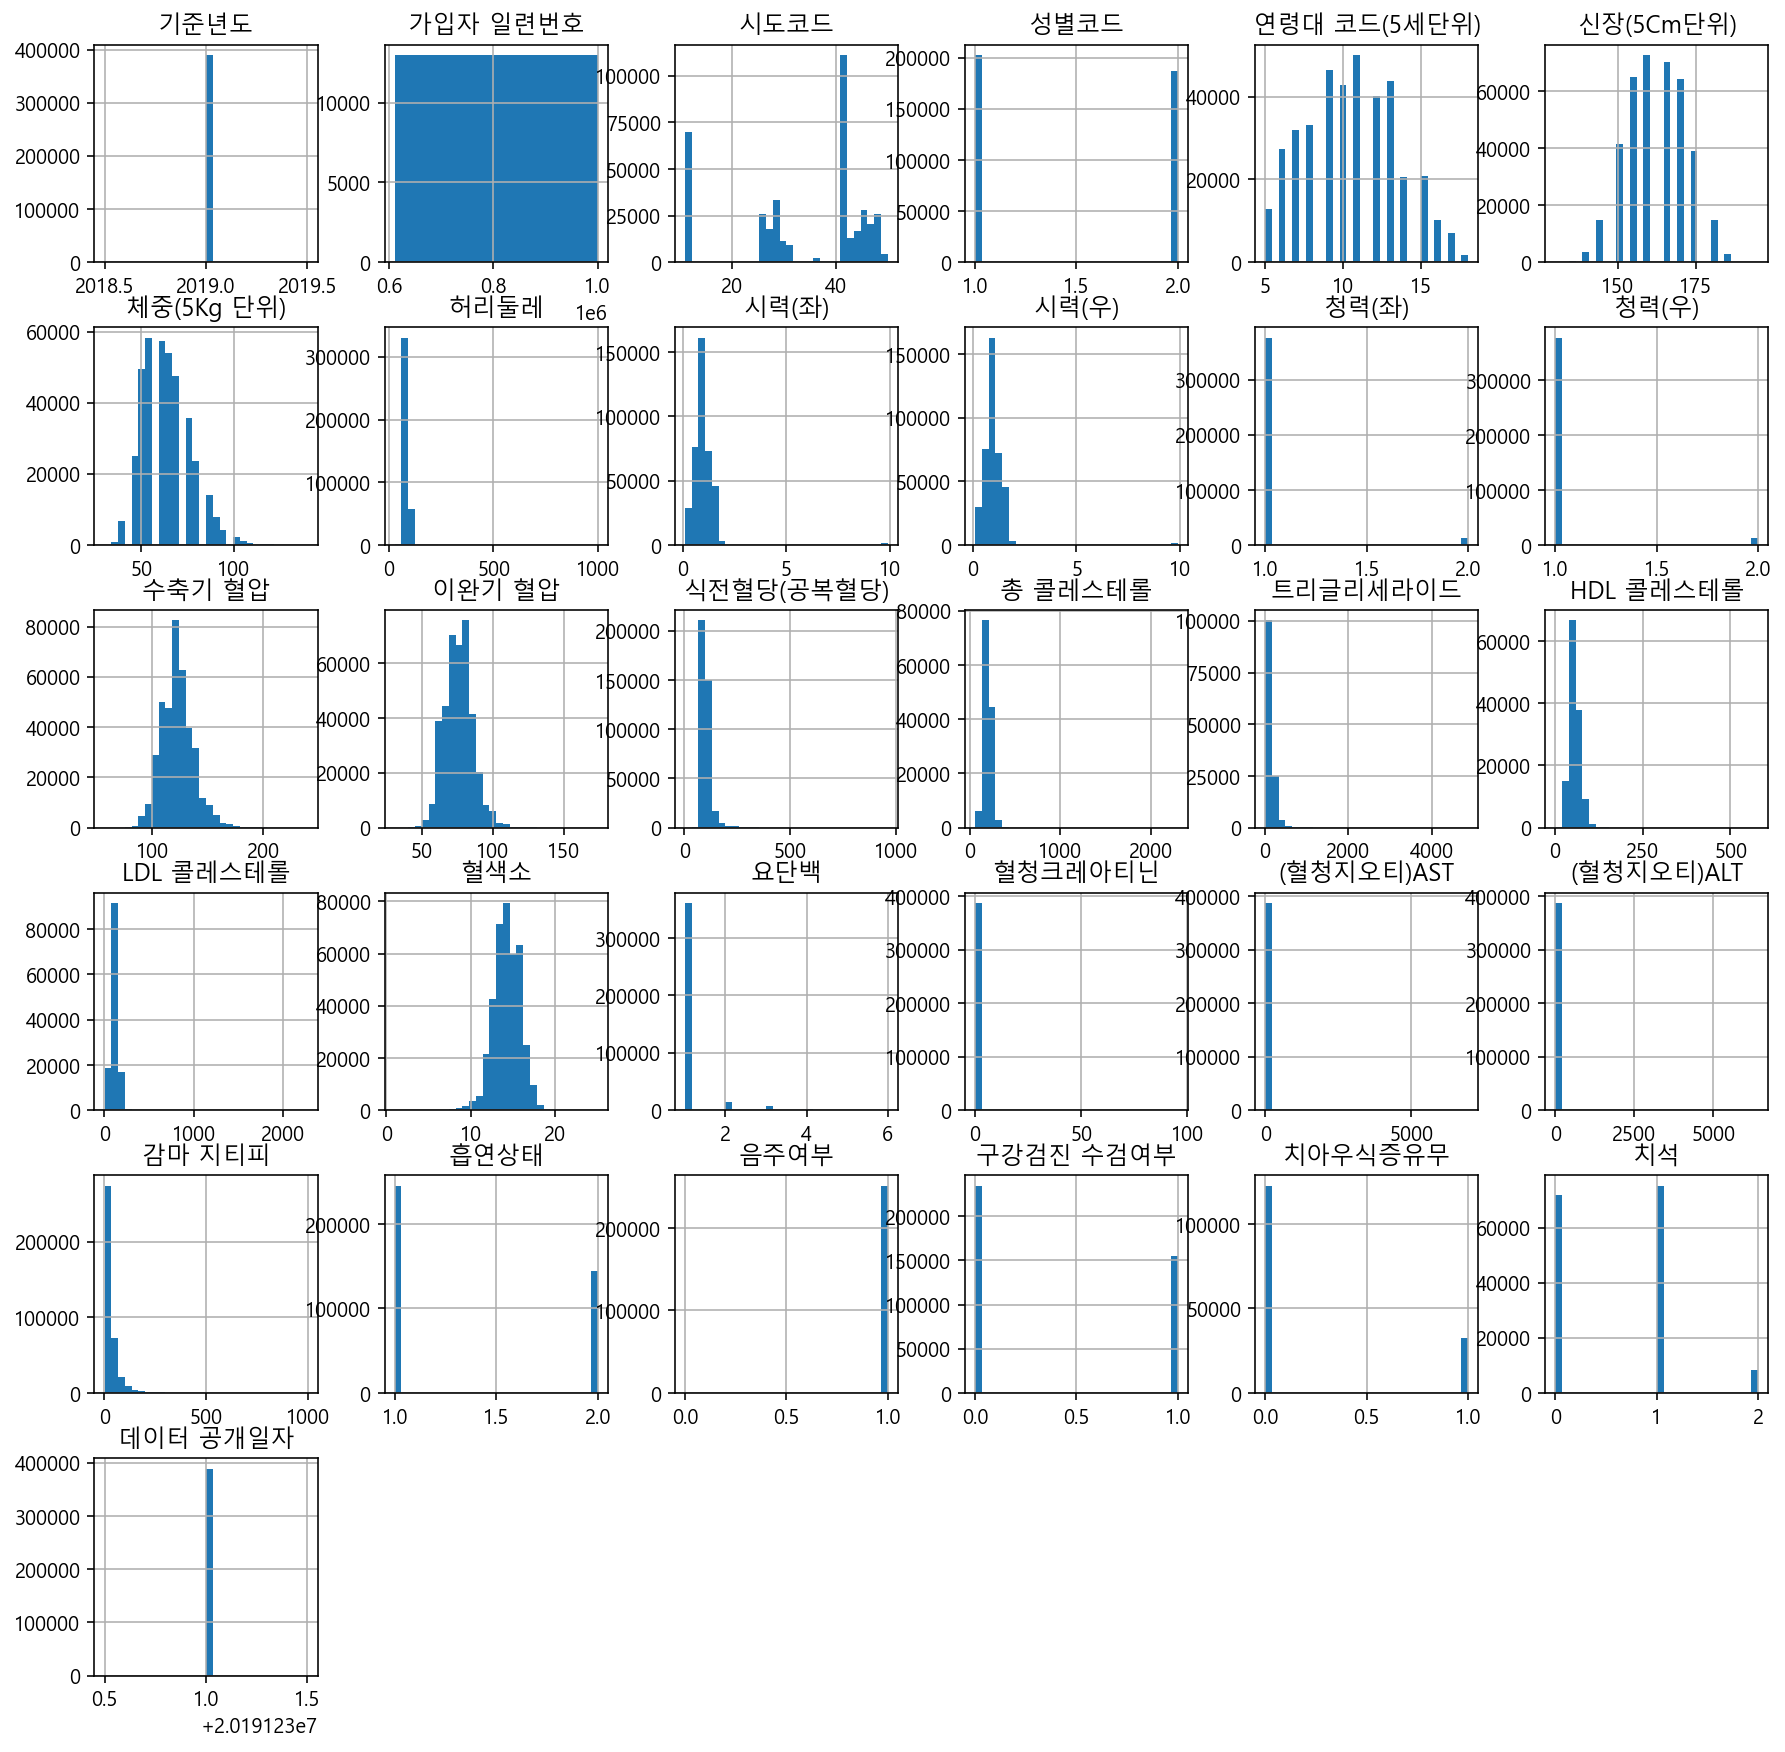

In [31]:
# 전체 데이터에 대한 히스토그램을 출력합니다

h = df.hist(figsize=(15,15), bins=30)

## 슬라이싱을 사용해 히스토그램 그리기
슬라이싱 기능을 사용해서 데이터를 나누어 그립니다
슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다
iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며 전체 데이터를 가져오고자 할때는 [:,:]을 사용합니다
슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작 인덱스:끝나는 인덱스(+1)을 지정할 수 있습니다
(0부터 시작)

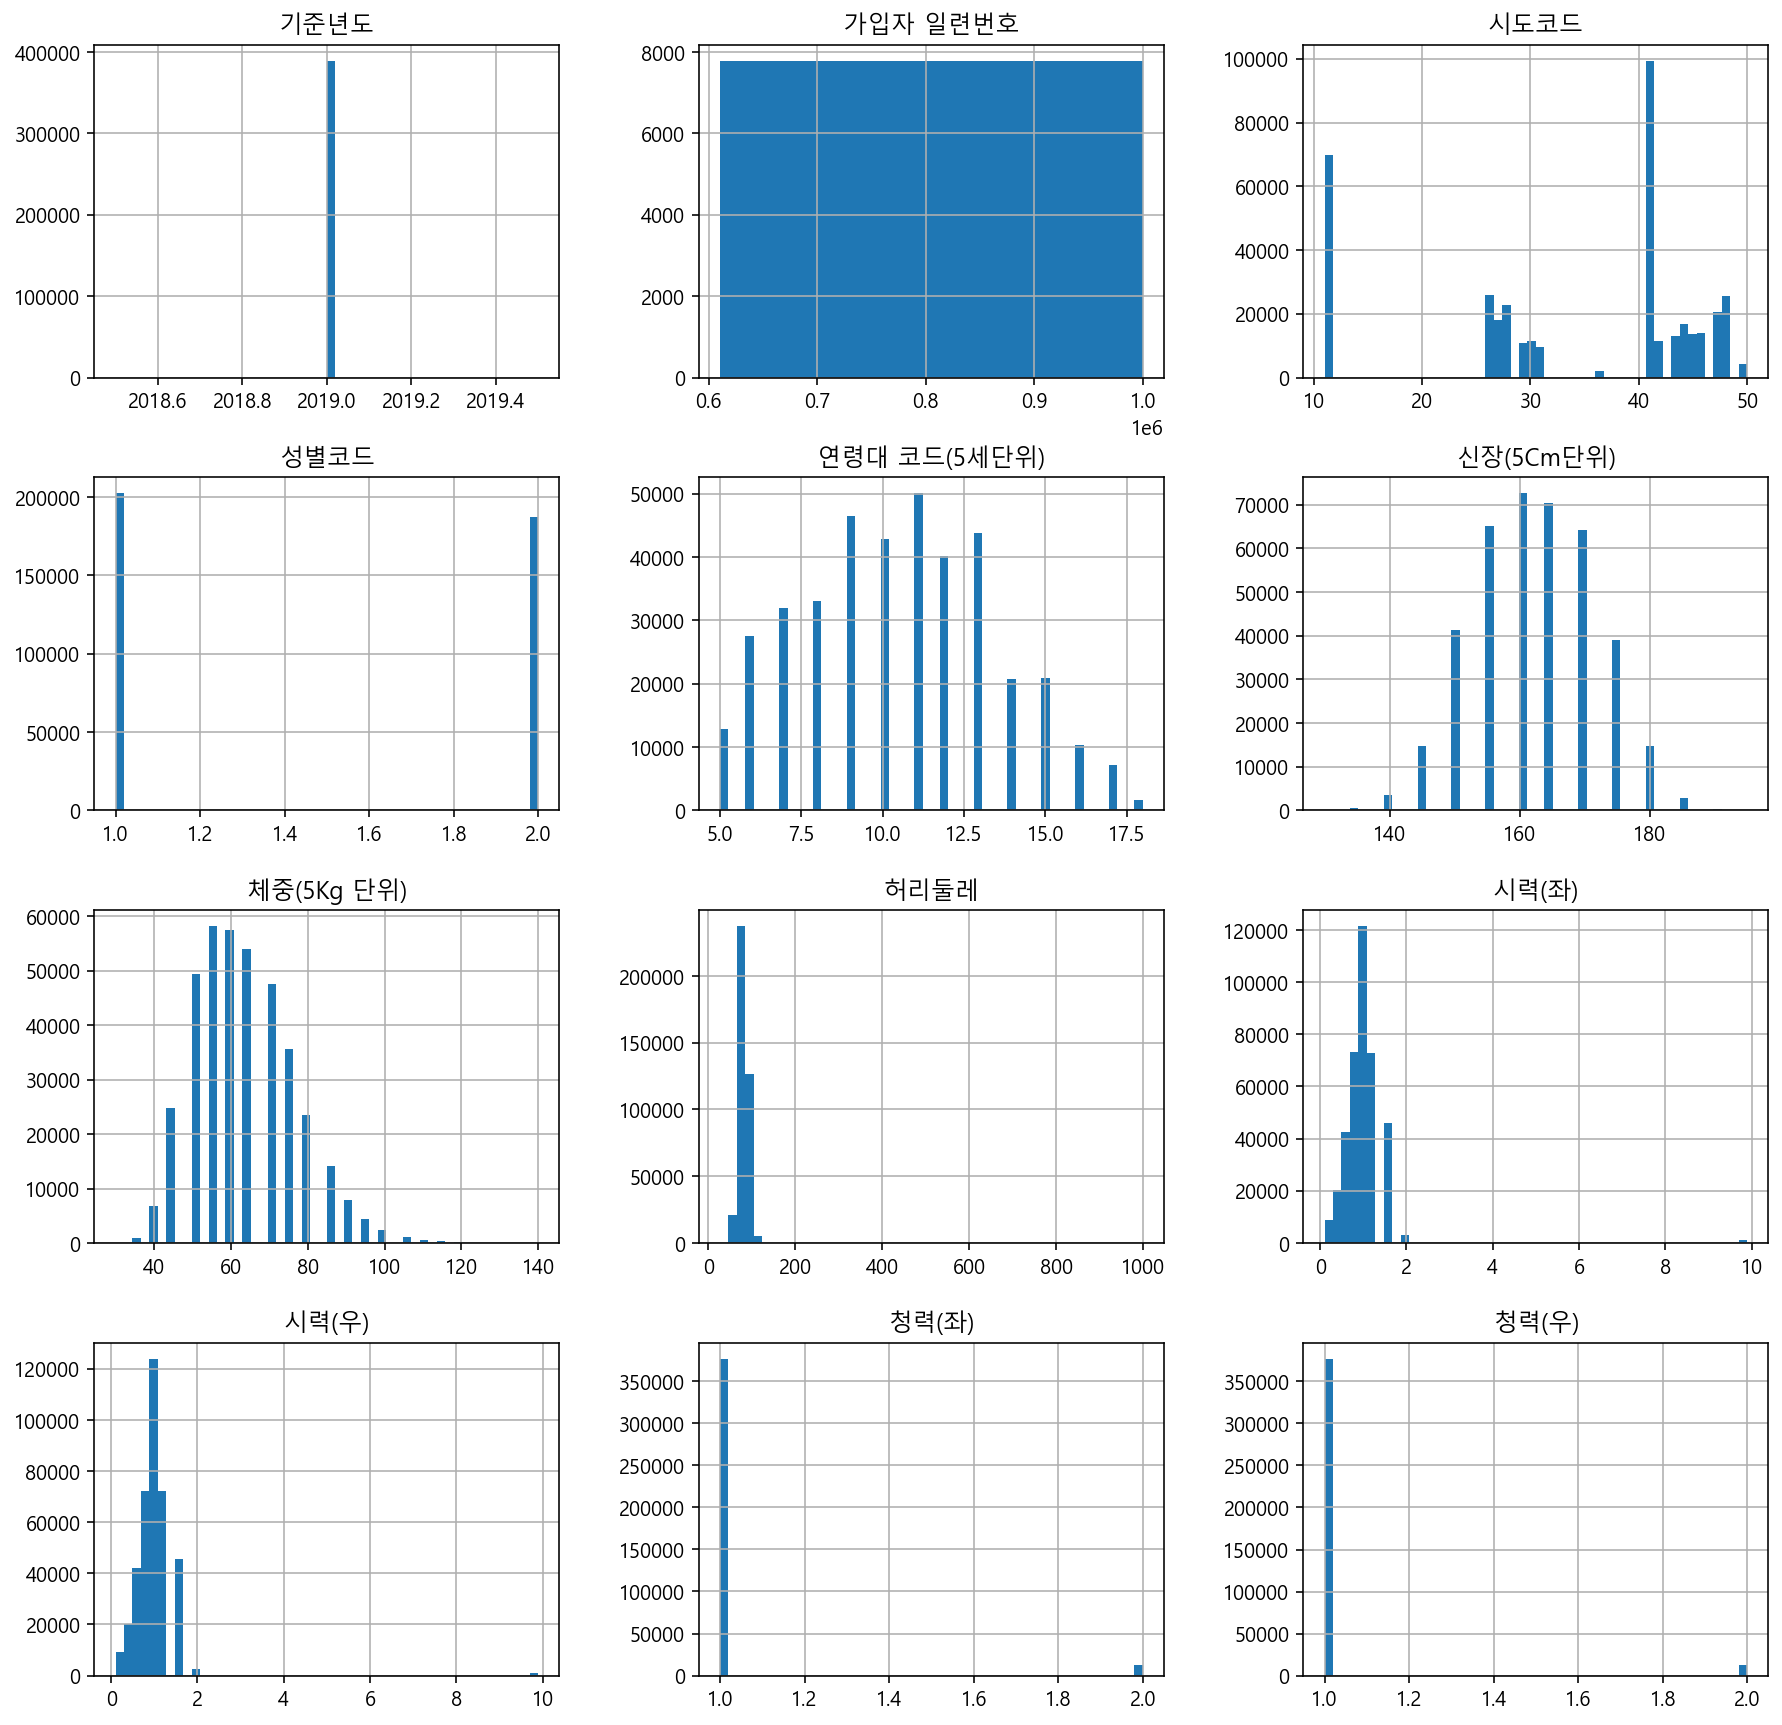

In [32]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 히스토그램을 그립니다
# [행, 열]

h = df.iloc[:, :12].hist(figsize=(15,15), bins=50)

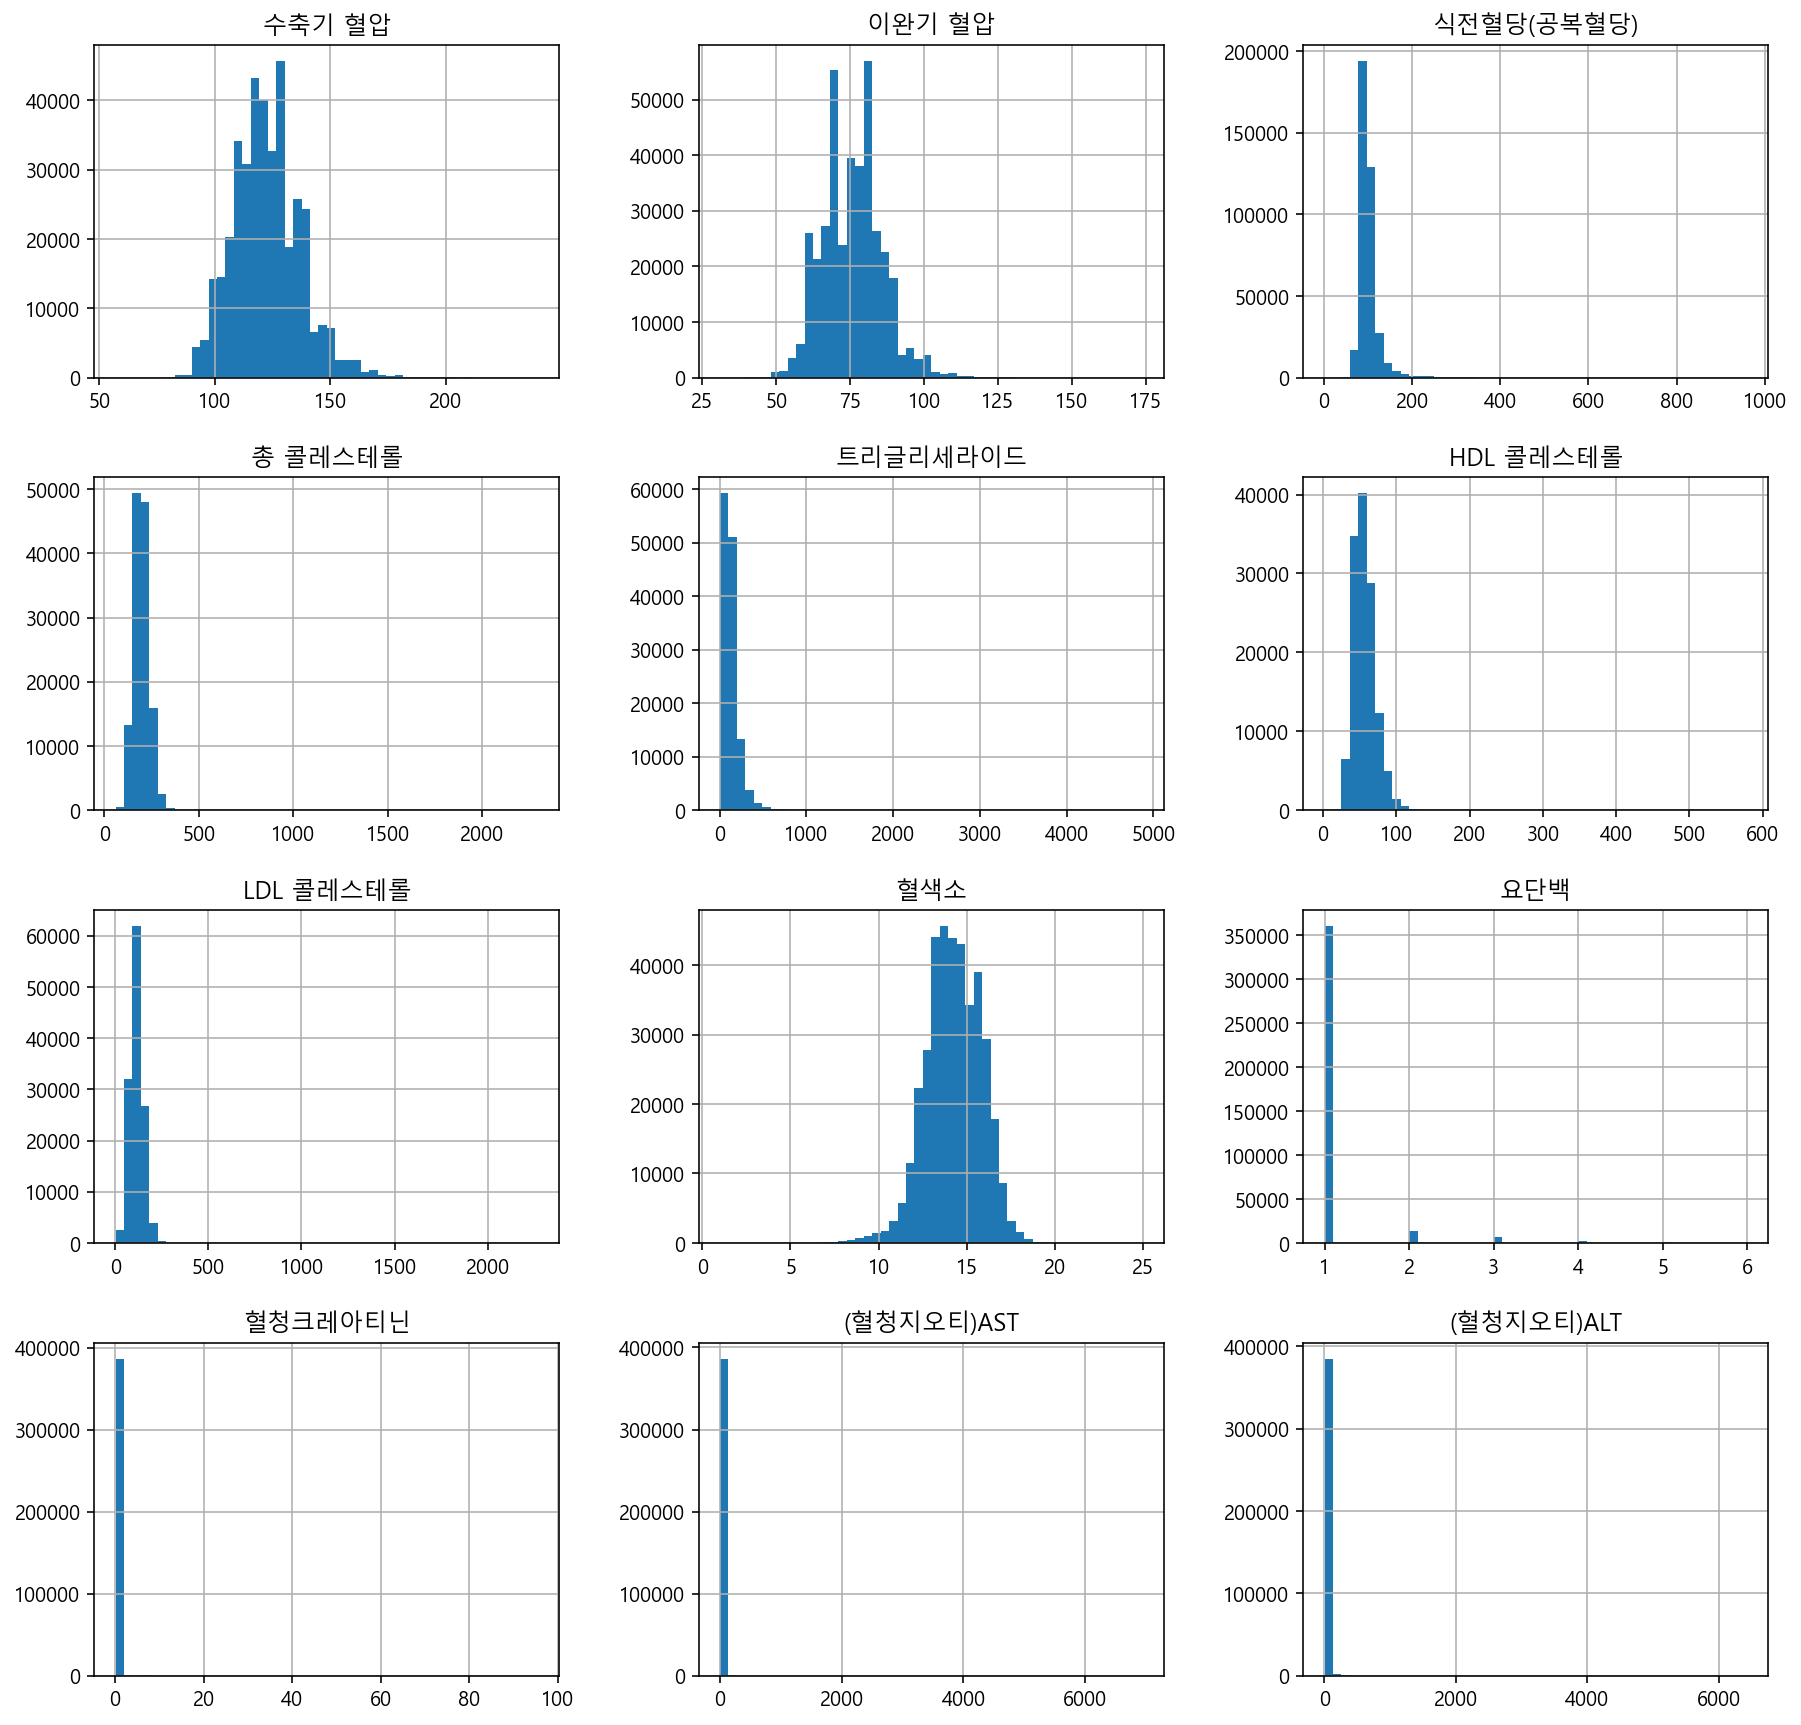

In [33]:
# 슬라이싱을 사용해서 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다. 

h = df.iloc[:, 12:24].hist(figsize=(15,15), bins=50)

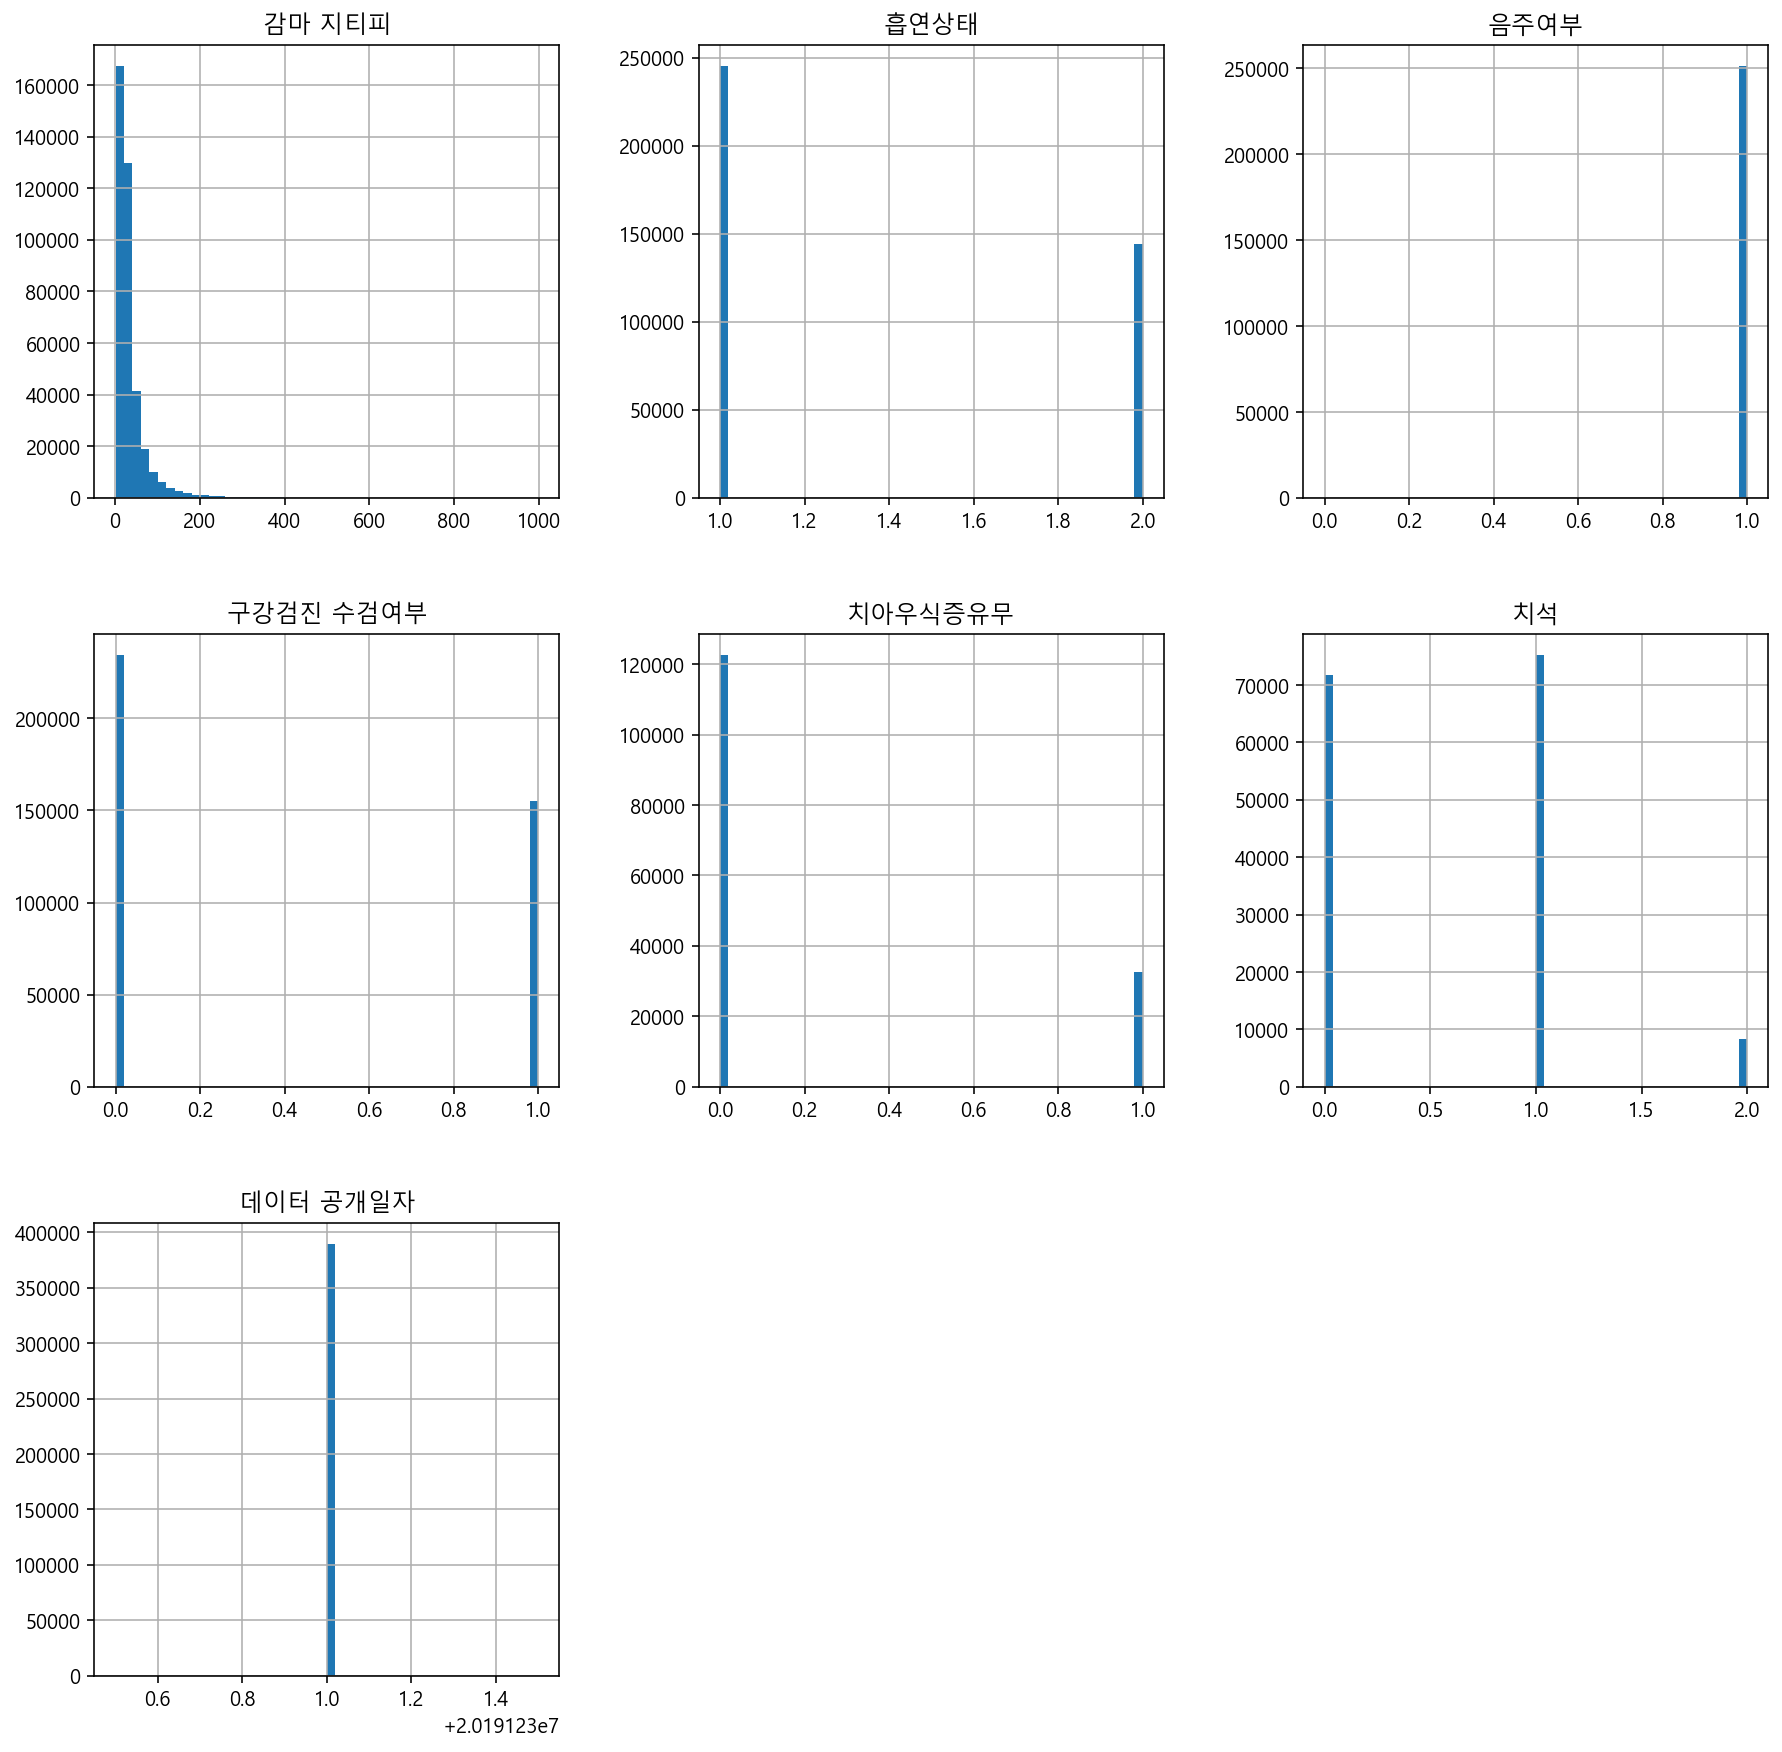

In [34]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 히스토그램을 그립니다. 

h = df.iloc[:,24:].hist(figsize=(15,15), bins=50)

# 샘플데이터 추출하기
seaborn의 그래프는 내부에서 수학적 연산을 하기 때문에 데이터가 많으면 속도가 오래 걸립니다
따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다

In [35]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다
# random_state를 사용해 샘플링되는 값을 고정할 수 있습니다. 
# 실험을 통제하기 위해 random_state를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할을 합니다

df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 Seaborn 사용하기
https://seaborn.pydata.org
seaborn은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며 간단하게 고급 통계 연산을 할 수 있습니다

# 범주형(카테고리) 데이터 시각화
countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다
value_counts로 구한 값을 시각화 한다고 보면 됩니다. 

## countplot - 음주여부

<AxesSubplot:>

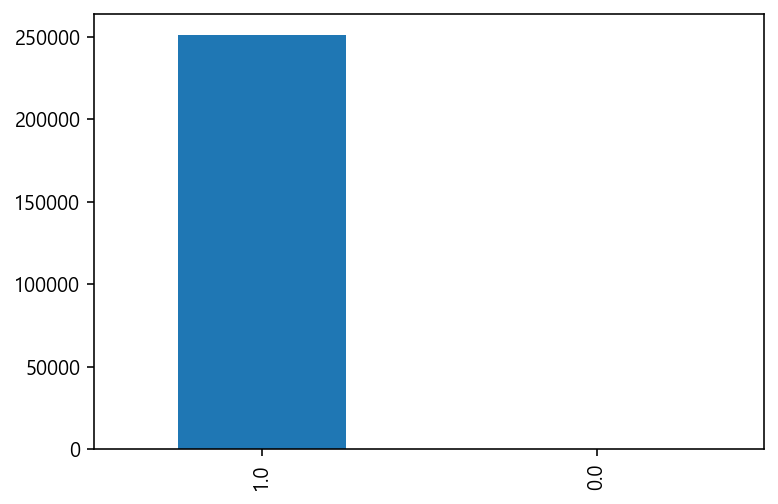

In [36]:
# 음주여부에 따른 그래프를 판다스로 그립니다

df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

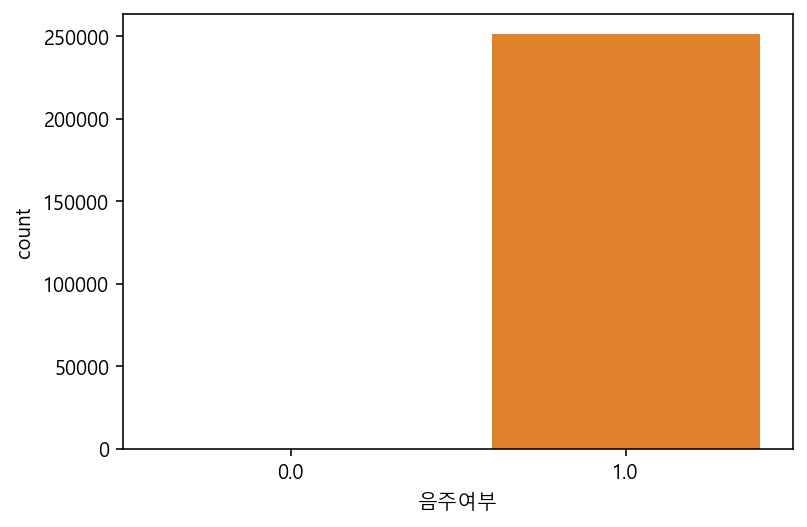

In [37]:
# 음주여부에 따른 countplot을 그립니다

sns.countplot(x="음주여부", data=df)

## hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

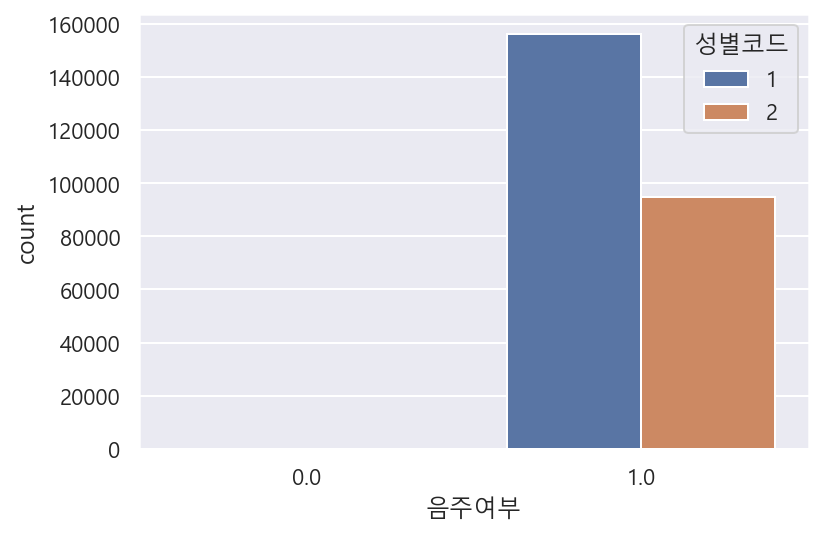

In [38]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그립니다
# 여기에 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다
# seaborn에서 제공하는 폰트 설정을 사용할 수도 있습니다
# 다만, 이때 seaborn의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다
# Mac
# sns.set(font_scale=1.5, font="AppleGothic")
# window
sns.set(font_scale=1, font="Malgun Gothic")


sns.countplot(x="음주여부", data=df, hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

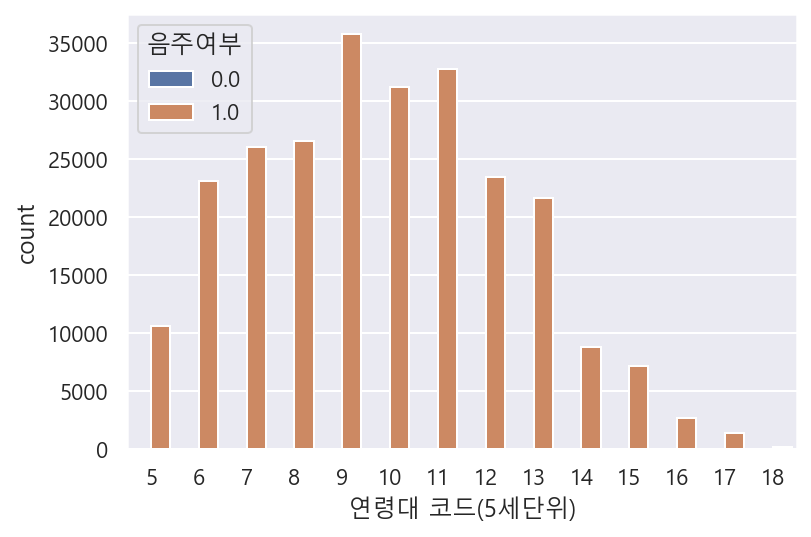

In [39]:
# countplot으로 연령대별 음주여부를 봅니다
# hue를 사용해 다른 색상으로 표현합니다

sns.countplot(x="연령대 코드(5세단위)", data=df, hue="음주여부")

## countplot - 키와 몸무게
키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
하지만, 이 데이터는 키는 5cm. 체중은 5kg 단위로 되어 있습니다.
이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다. 

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

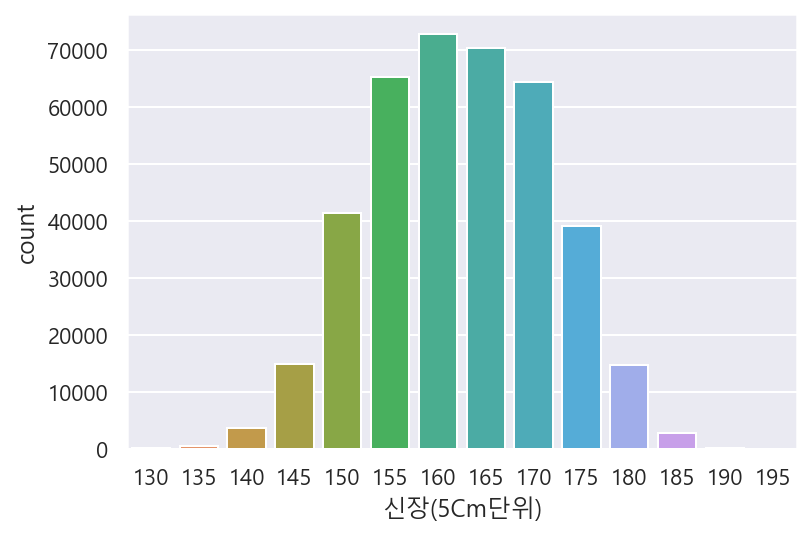

In [40]:
# countplot으로 키를 봅니다.

sns.countplot(x="신장(5Cm단위)", data=df)

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

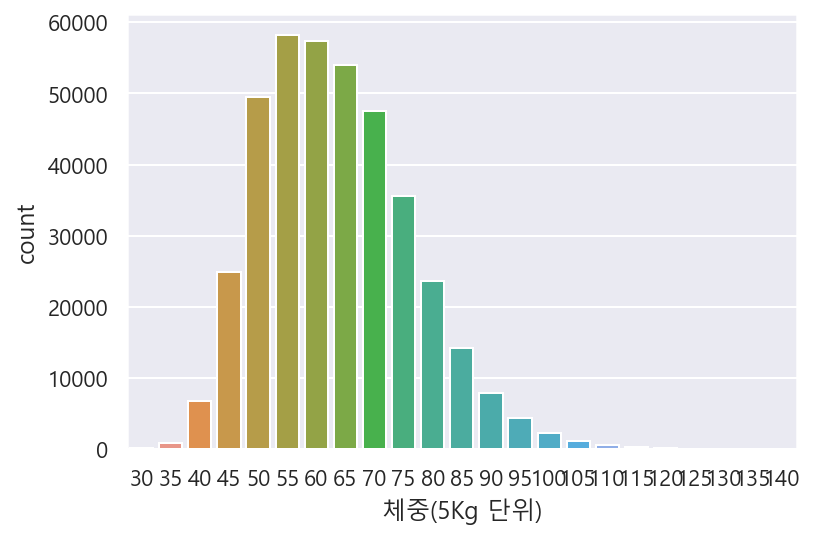

In [41]:
# countplot로 체중을 봅니다

sns.countplot(data=df, x="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

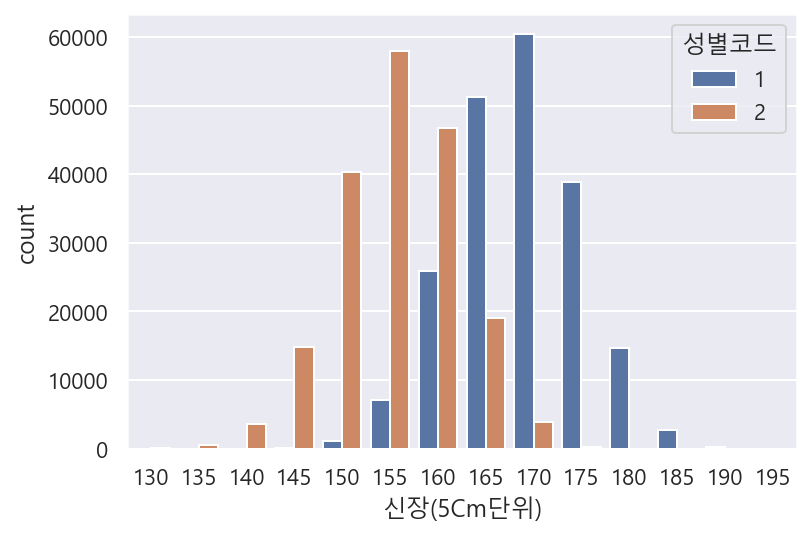

In [42]:
# countplot로 신장(5cm단위)를 봅니다
# 성별에 따른 키의 차이를 봅니다

sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

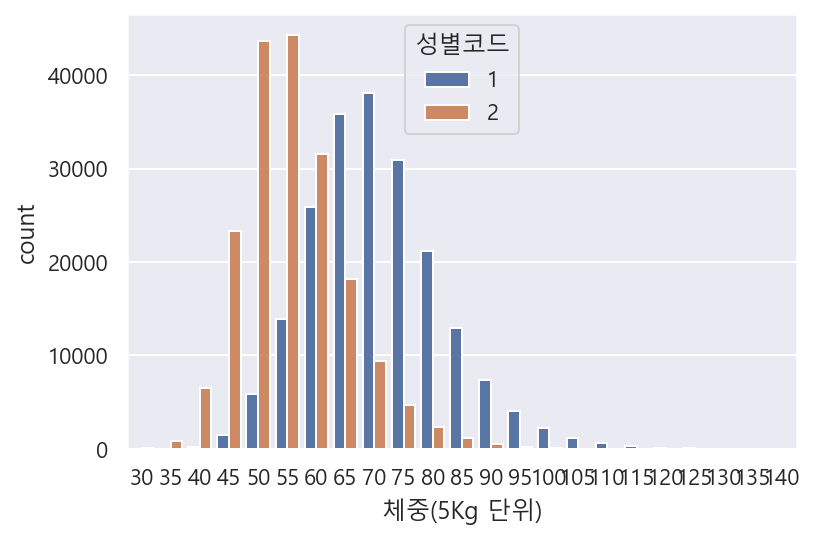

In [43]:
# 성별에 따른 체중의 차이를 봅니다

sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

## barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

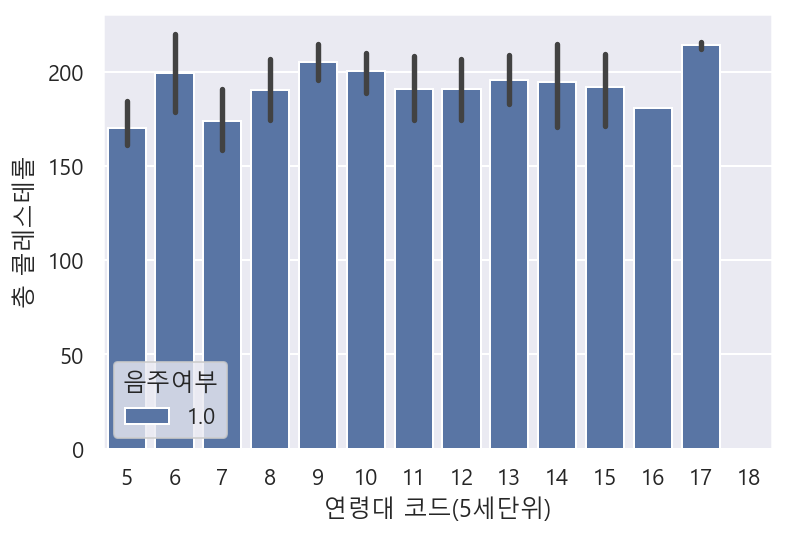

In [44]:
# 연령대코드와 총 콜레스테롤을 봅니다
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다


# 신뢰구간  ci = None / 95 (95%) / "sd"(표준편차)



sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

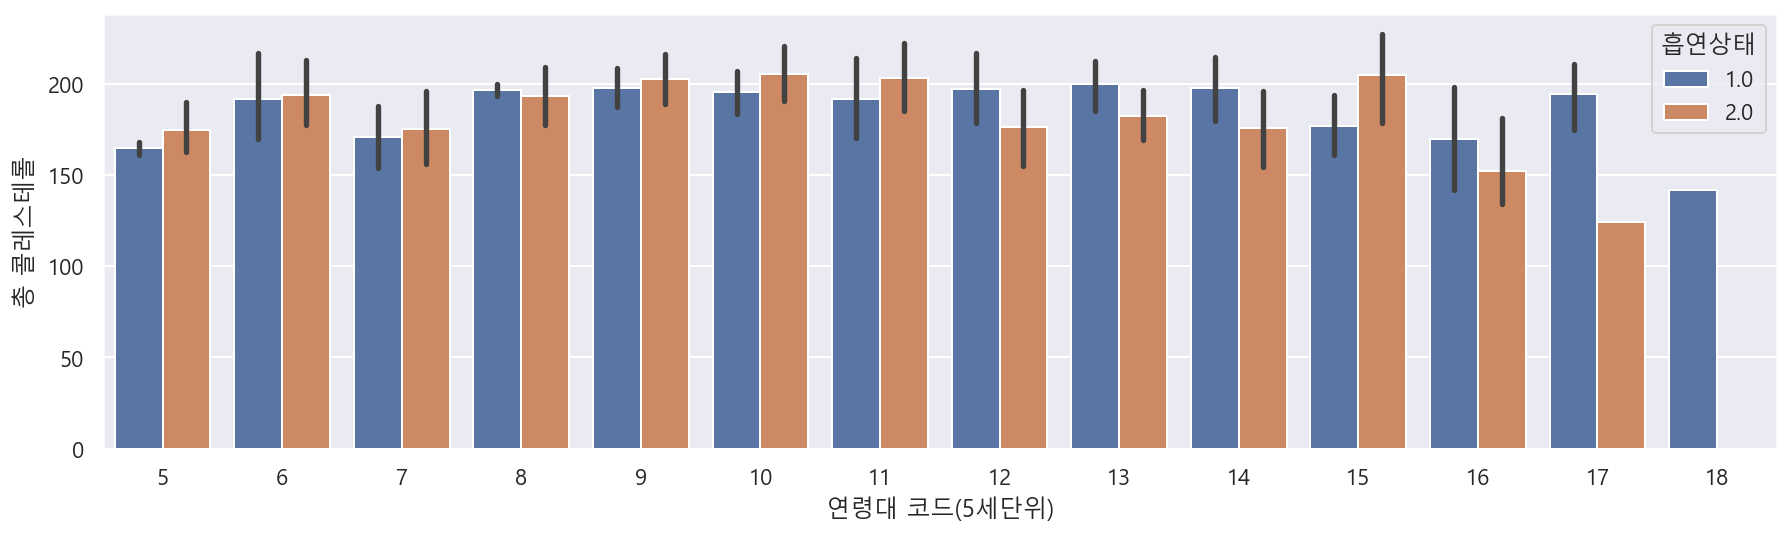

In [45]:
# 연령대코드와 총 콜레스테롤을 봅니다
# 콜레스테롤과 연령대코드(5세 단위)를 흡연상태에 따라 barplot로 그립니다 


# 신뢰구간  ci = None / 95 (95%) / "sd"(표준편차)


plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

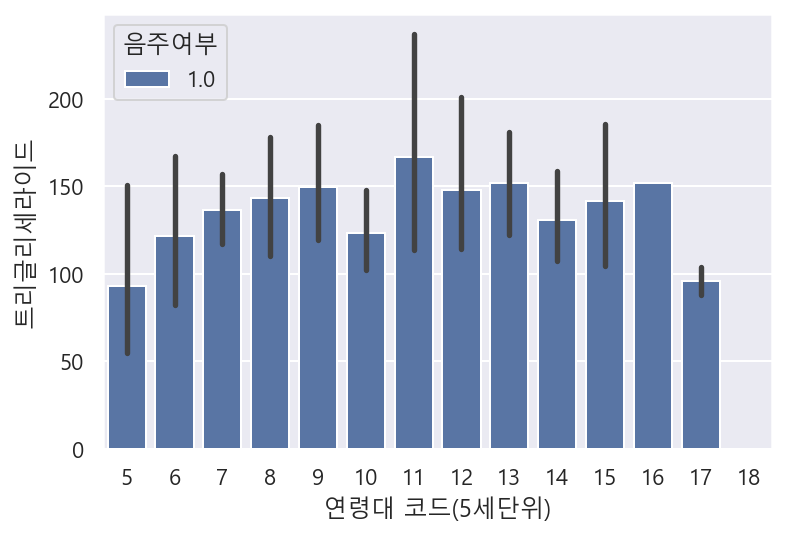

In [46]:
# 트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다

sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="트리글리세라이드", hue="음주여부")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='음주여부'>

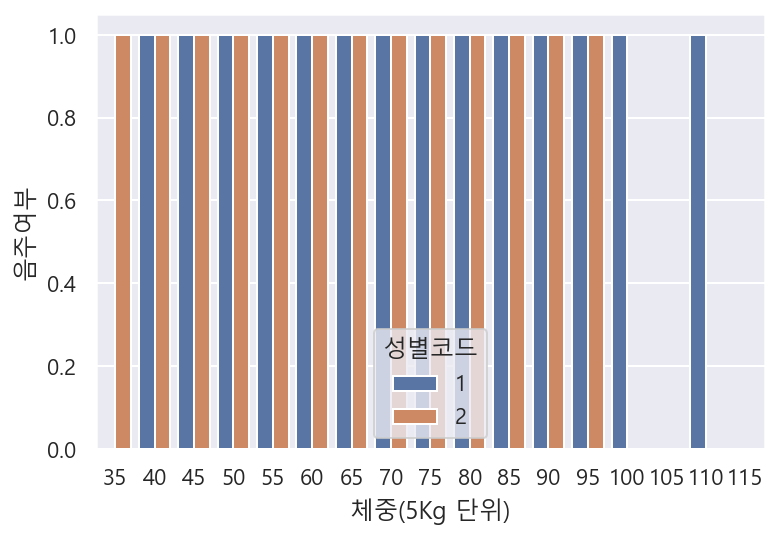

In [47]:
#음주여부와 체중(5kg 단위)을 성별에 따라 봅니다

sns.barplot(data=df_sample, x="체중(5Kg 단위)", y="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

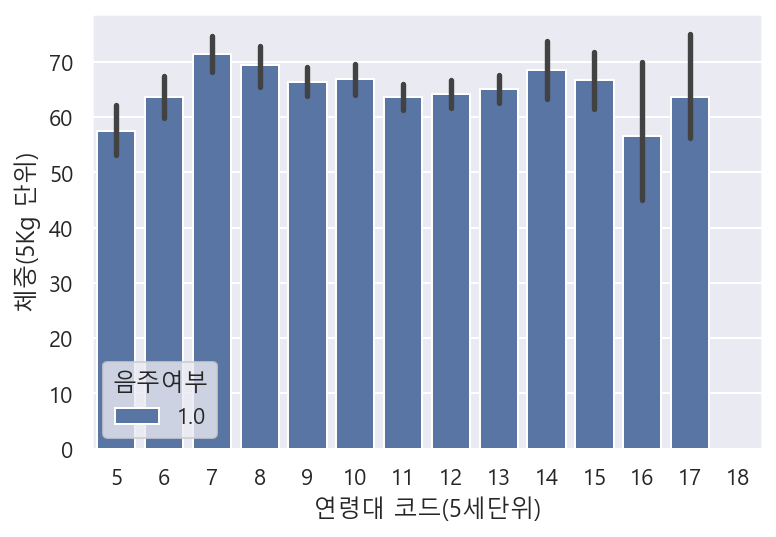

In [48]:
# 연령대코드(5세단위)에 따른 체중(5kg 단위)을 음주여부에 따라 barplot으로 그립니다. 

sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부")

## lineplot and pointplot

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

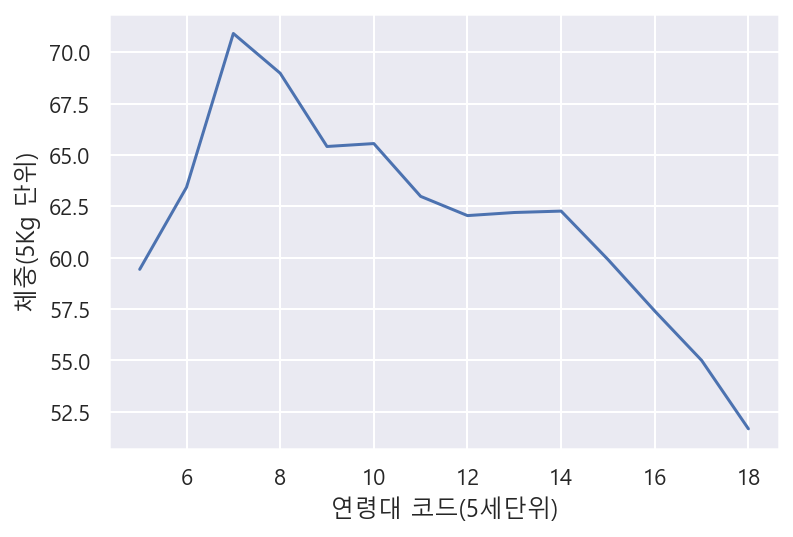

In [49]:
# 연령대 코드(5세단위) 에 따른 체중(5Kg 단위) 을 성별코드에 따라 lineplot으로 그립니다

sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", ci=None)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

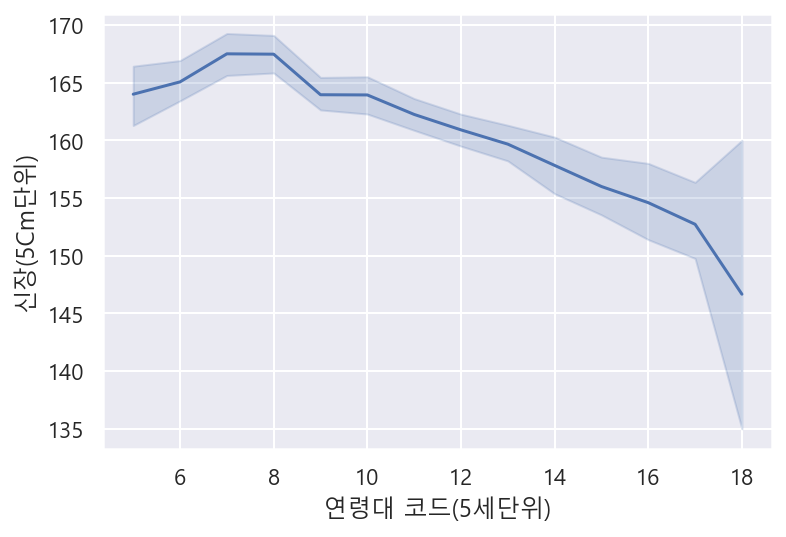

In [50]:
# 연령대 코드(5세단위) 에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot으로 그립니다

sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

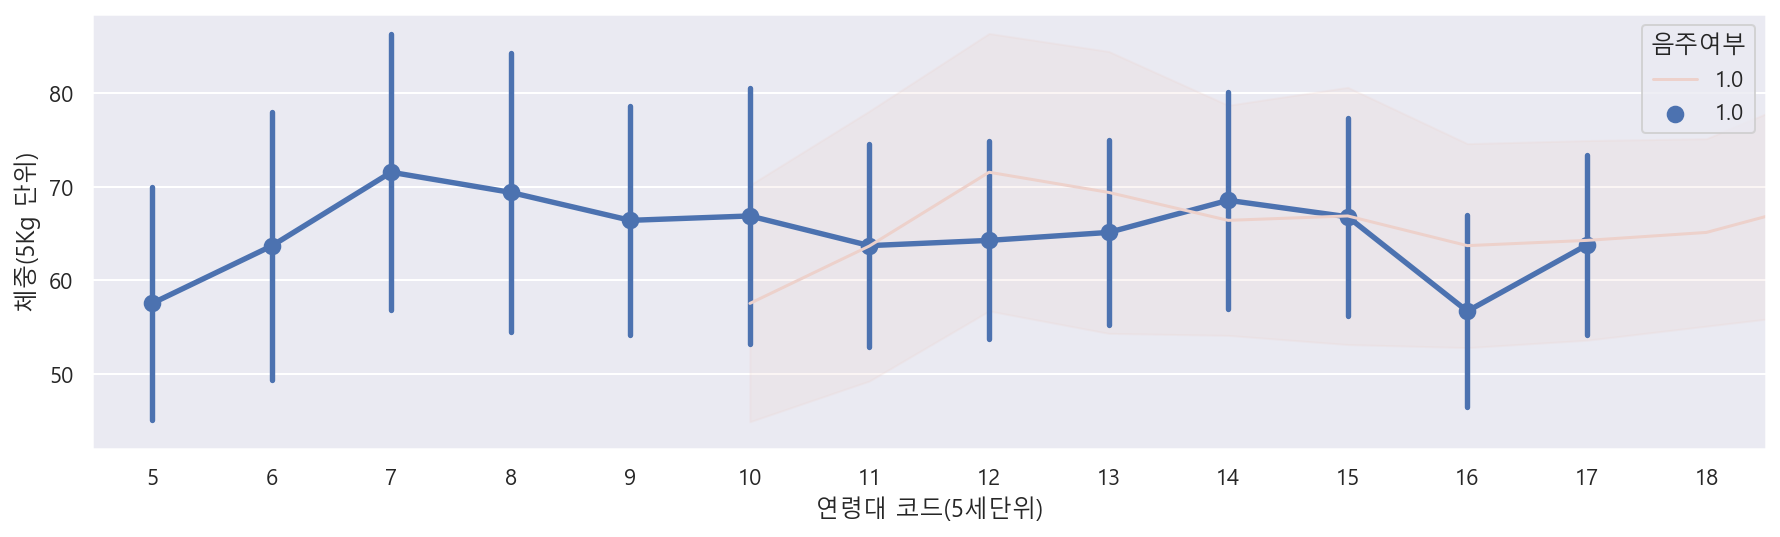

In [51]:
# 연령대 코드(5세단위) 에 따른 체중(5Kg 단위)을 음주여부에 따라 pointplot과 barplot으로 그립니다

plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

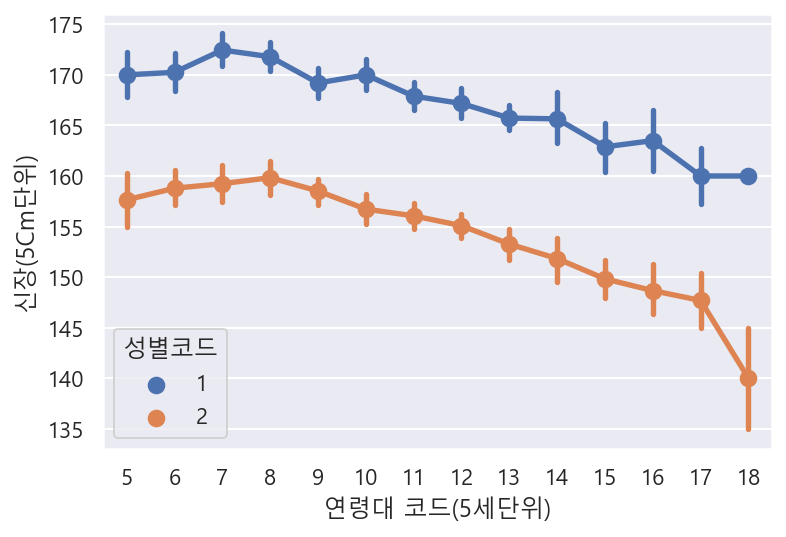

In [52]:
# 연령대 코드(5세단위) 에 따른 신장(5Cm)을 성별코드에 따라 pointplot으로 그립니다

sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

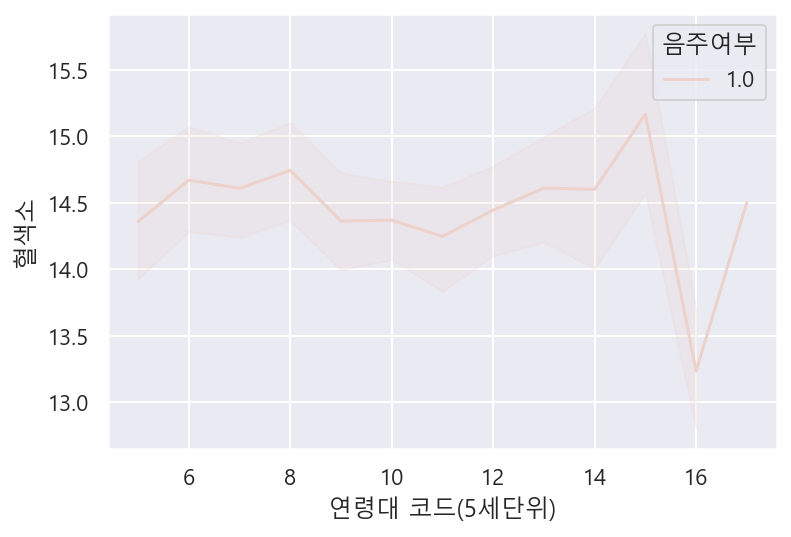

In [53]:
# 연령대 코드(5세단위)) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다

sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부")

## boxplot
https://pandas.pydata.org/pandas-docs/stable/user_guide/visuslization.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
상자수염그림 

가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다
5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯가지 수치를 의미한다

1. 최솟값
2. 제1사분위수
3. 제2사분위수 (중앙값)
4. 제3사분위수
5. 최댓값
6. Boxplot 이햐하기 

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

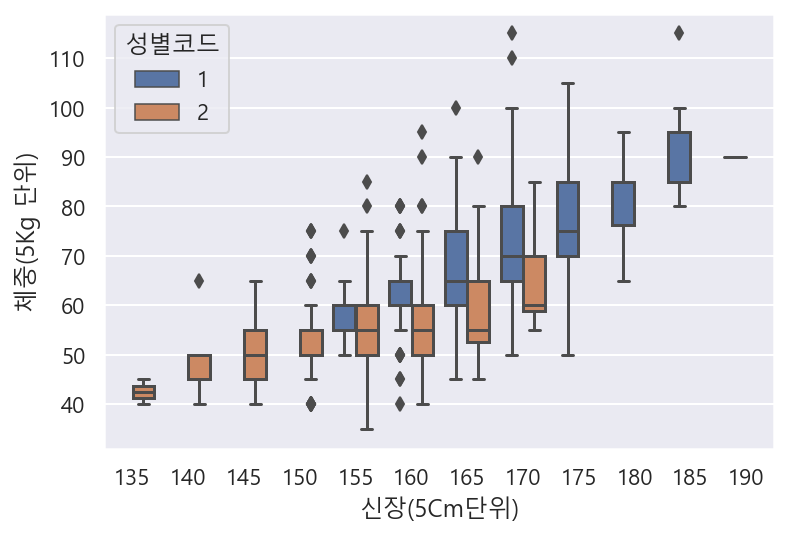

In [54]:
# boxplot으로 신장(5Cm단위) 에따른 체중(5Kg 단위) 을 그리며 성별코드에 따라 다른 색상으로 표현하게 합니다

sns.boxplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

## violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

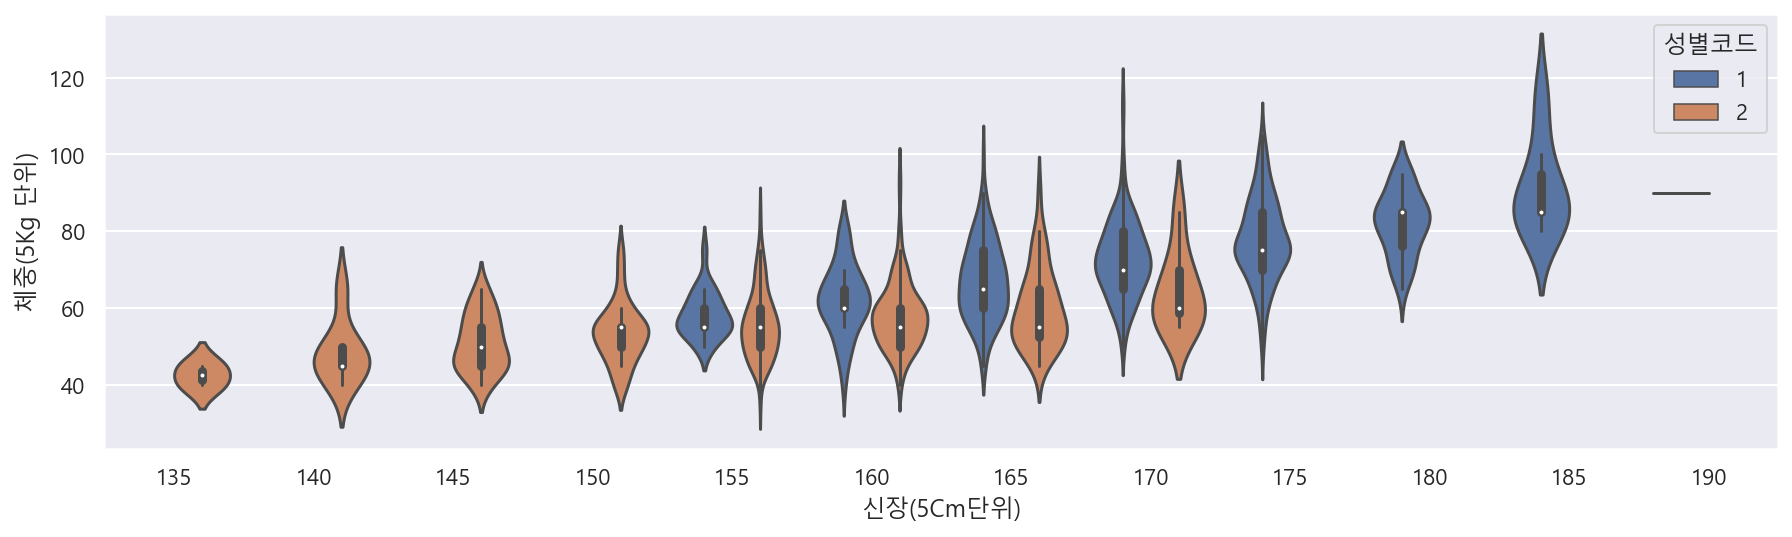

In [55]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며 음주여부에 따라 다른 색상으로 표현하게 합니다. 

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

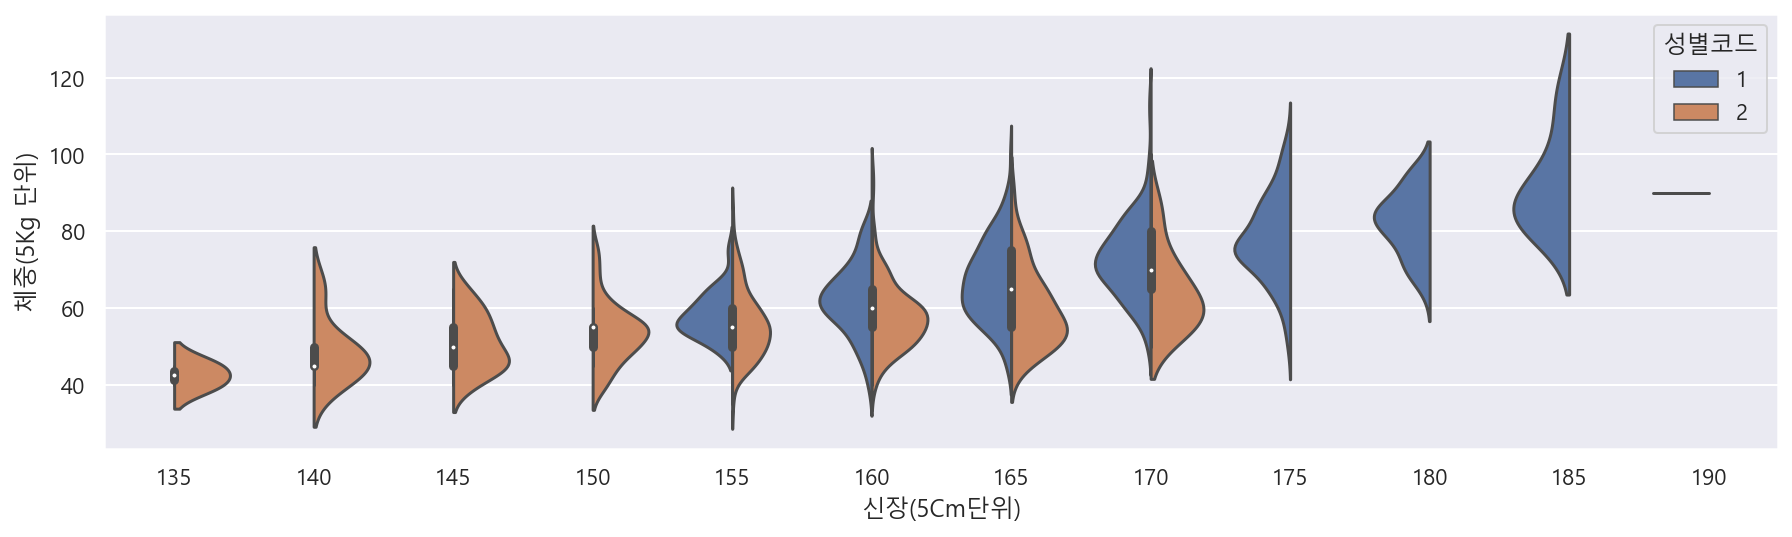

In [56]:
# violinplot 의 split 기능을 사용해 봅니다

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드", split=True)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

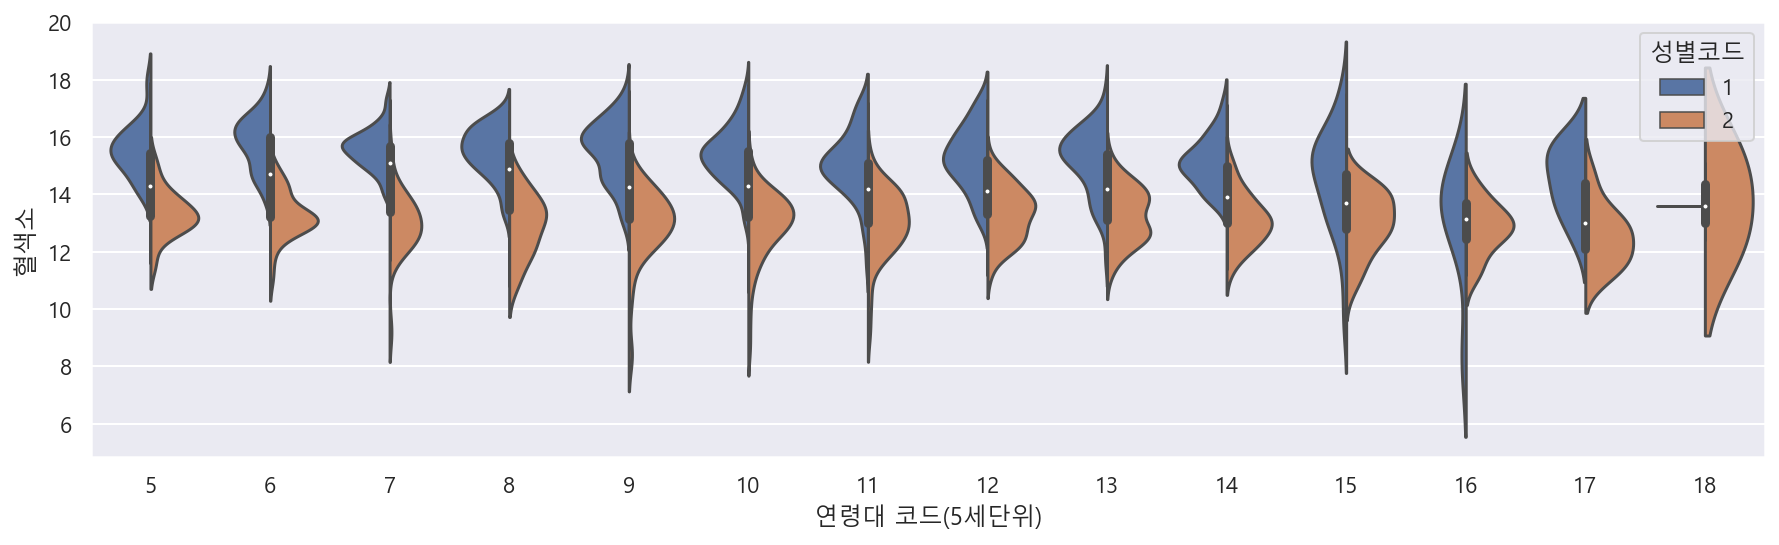

In [57]:
# violinplot 연령대 코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현하게 합니다

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="성별코드", split=True)

## swarm plot and lmplot
범주형 데이터를 산점도로 시각화하고자 할때 사용합니다

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

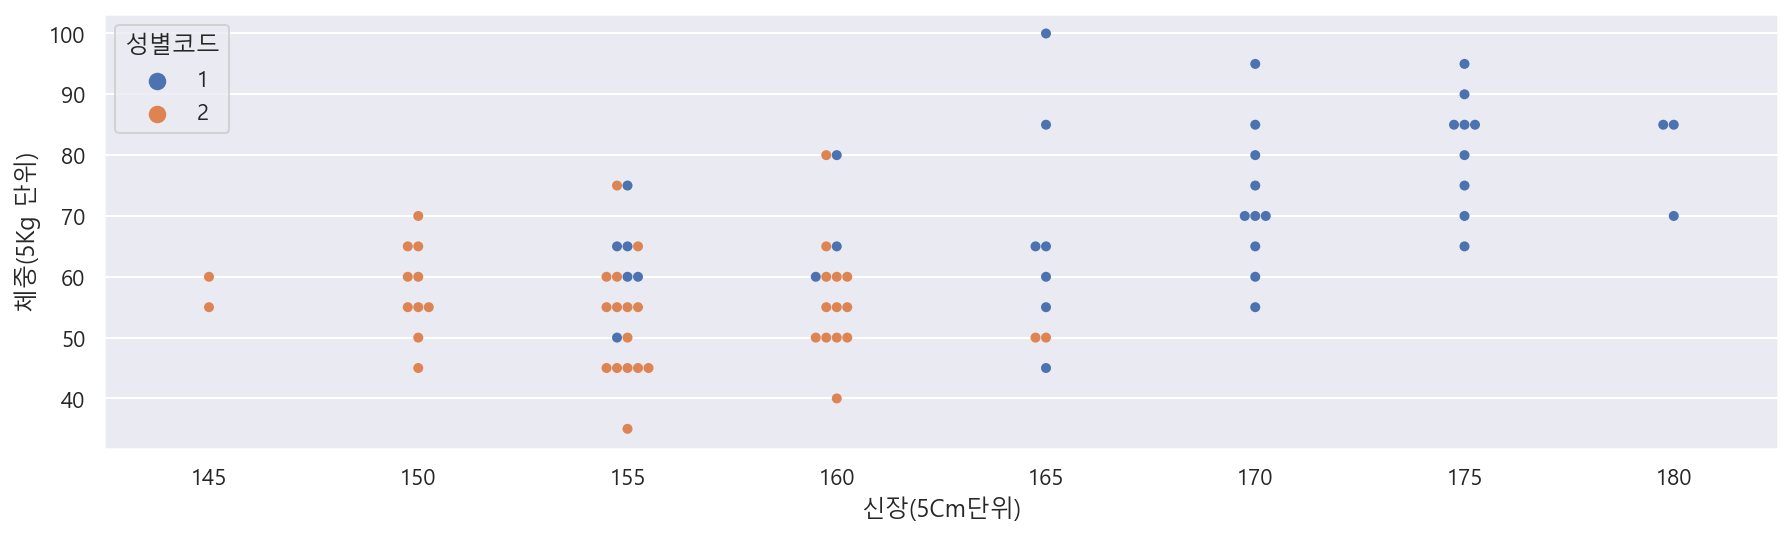

In [58]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현하게 합니다
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다

plt.figure(figsize=(15,4))
df_sample2=df.sample(80, random_state=1)
sns.swarmplot(data=df_sample2, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

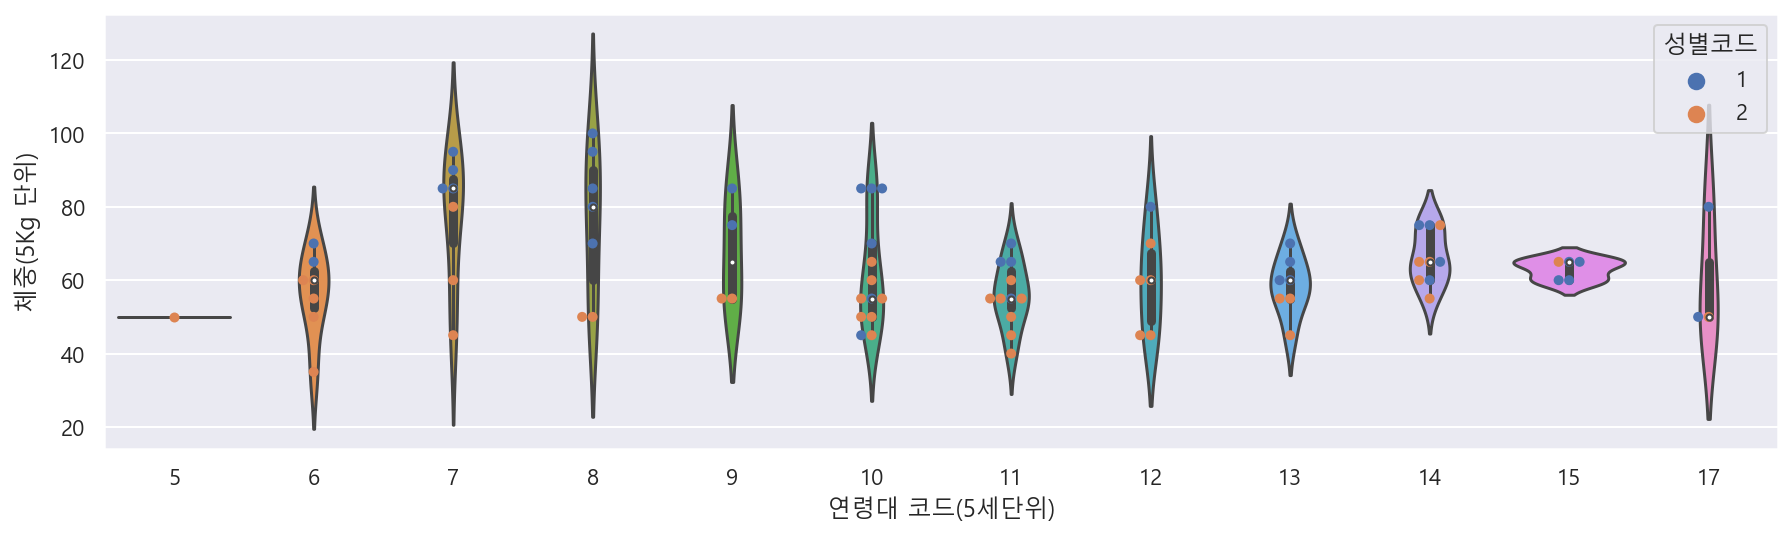

In [59]:
# swarmplot으로 연령대 코드(5세단위)에 따른 음주여부 그리며, 성별코드에 따라 다른 색상으로 표현하게 합니다
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample2, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")
sns.violinplot(data=df_sample2, x="연령대 코드(5세단위)", y="체중(5Kg 단위)")

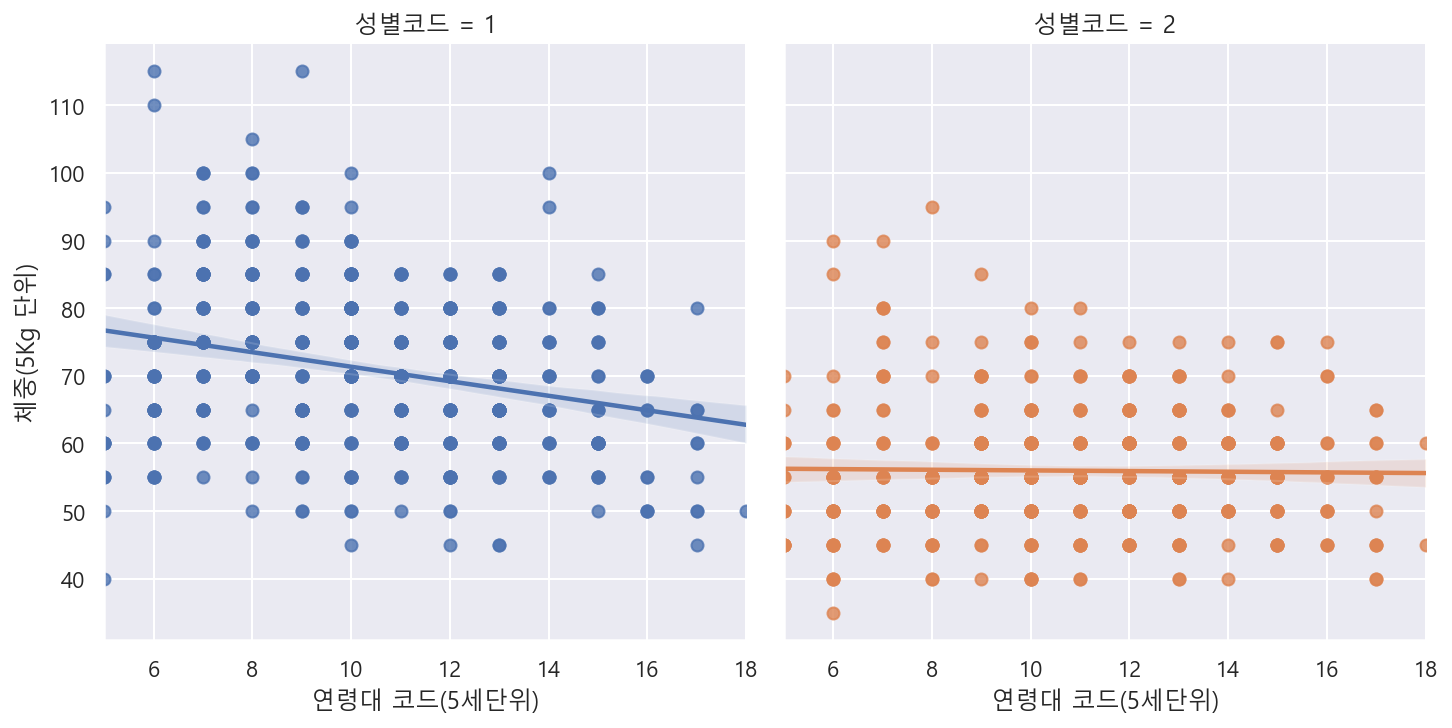

In [60]:
# lmplot 으로 그리기

sns.lmplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", col="성별코드")

# 수치형 데이터 시각화

## scatterplot - 산점도
수치형 vs 수치형 데이터의 상관관계를 볼 때 주로 사용합니다
점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

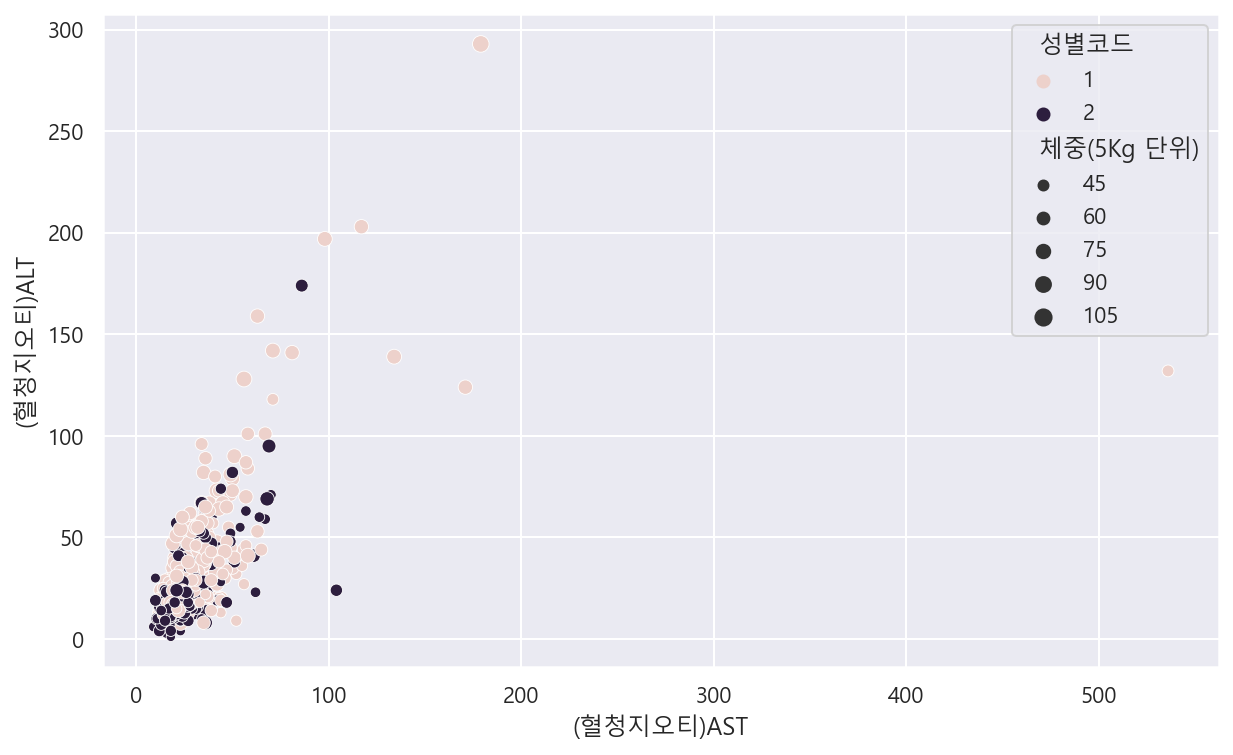

In [61]:
#scatterplot 으로 (혈청지오티)AST, (혈청지오티)ALT를 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다
# size 원의 크기를 다르게 표시

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="성별코드", size="체중(5Kg 단위)")

## lmplot - 상관관계 보기

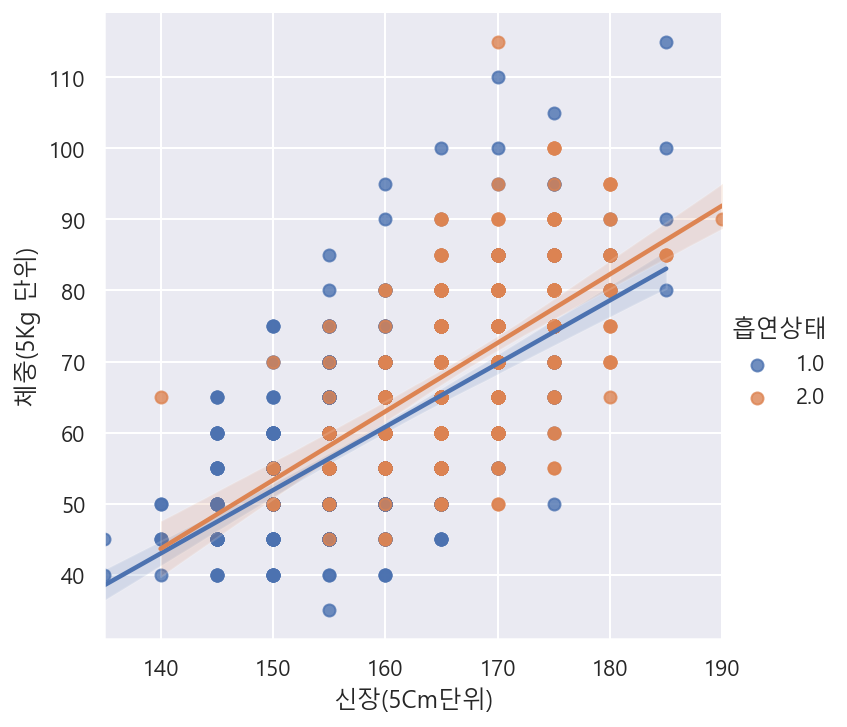

In [62]:
# lmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며 음주여부에 따라 다른 색상으로 표현되게 합니다

sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="흡연상태")

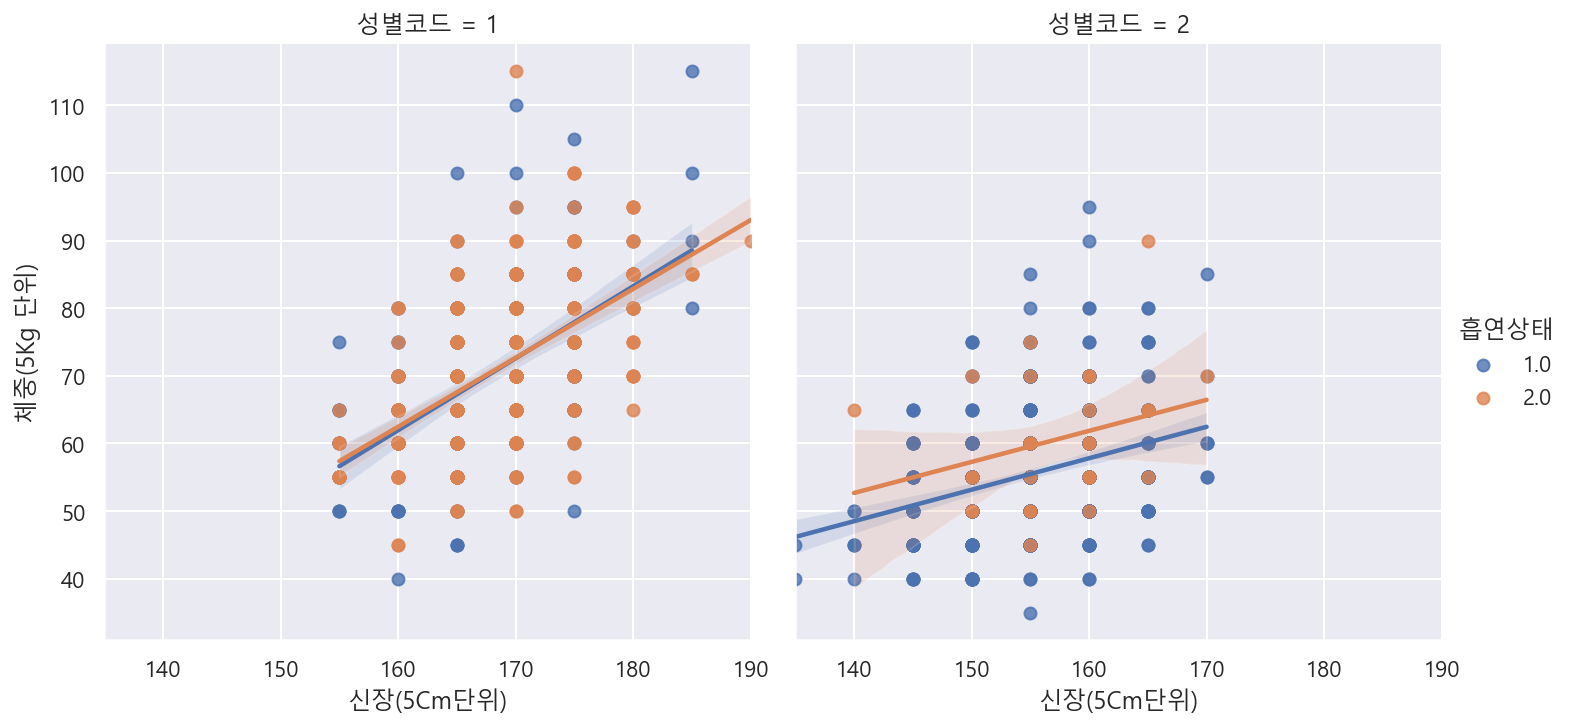

In [63]:
# lmplot의 col 기능을 통해 음주여부에 따라 서브플롯을 그려봅니다

sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="흡연상태", col="성별코드")

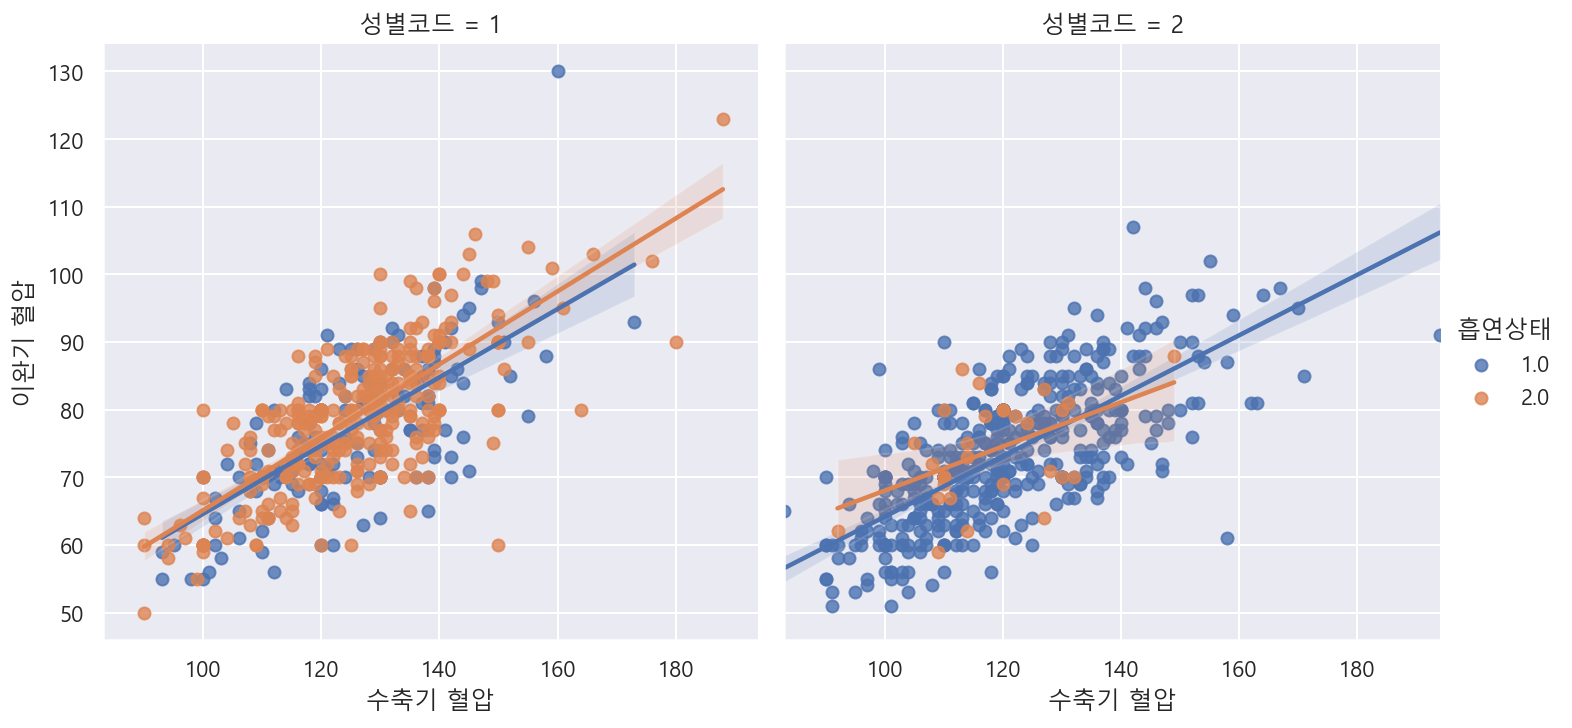

In [64]:
# lmplot으로 수축기 혈압, 이완기 혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다 
# robust=True  이상치 제거 

sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="흡연상태", col="성별코드", robust=True)

## 이상치 다루기
이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다. 
시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다

In [65]:
# (혈청지오티)AST, 와 (혈청지오티)ALT 가 400 이하인 값만 데이터프레임 형태로 추출해서 
# df_ASLT라는 변수에 답습니다

df_ASLT = df_sample[(df_sample["(혈청지오티)AST"]<400) & (df_sample["(혈청지오티)ALT"]<400)]
df_ASLT.shape

(990, 34)

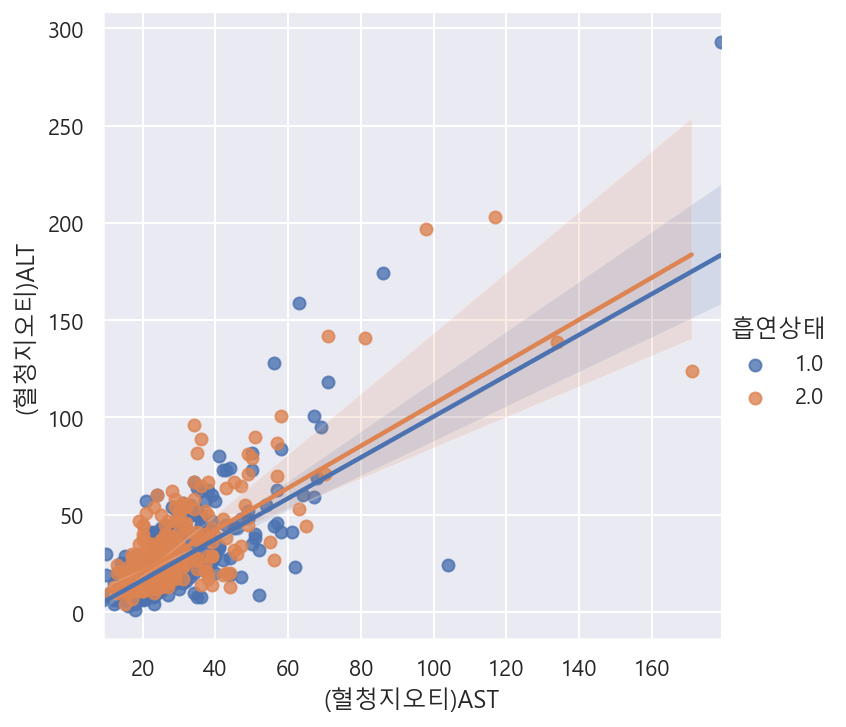

In [66]:
# 이상치를 제거한 (혈청지오티)AST, 와 (혈청지오티)ALT 를 lmplot으로 그리며 
# 음주여부에 따라 다른 색으로 표현합니다

sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="흡연상태", robust=True)

In [67]:
# (혈청지오티)AST, 와 (혈청지오티)ALT 가 400 이상인 값만 데이터프레임 형태로 추출해서 
# df_ASLT_high라는 변수에 답습니다

df_ASLT_high = df[(df["(혈청지오티)AST"]>400) & (df["(혈청지오티)ALT"]>400)]

In [68]:
# 위에서 구한 df_ASLT_high 데이터프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다

df_ASLT_high

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
6142,2019,616731,28,2,9,160,50,71.0,1.2,1.2,...,105.0,1.0,1.0,1,0.0,미시행,미시행,미시행,2.0,20191231
7302,2019,617891,41,1,10,160,50,73.2,0.4,0.4,...,108.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
7459,2019,618048,48,2,13,155,65,87.0,0.7,1.5,...,181.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
14550,2019,625139,46,2,10,160,70,87.5,0.5,0.5,...,327.0,2.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231
34356,2019,644945,27,2,9,150,60,79.0,1.2,1.2,...,505.0,1.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231
39215,2019,649804,41,2,9,160,75,88.0,0.7,0.8,...,413.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
44901,2019,655490,11,1,10,180,80,96.0,1.2,1.2,...,121.0,2.0,1.0,1,0.0,미시행,미시행,미시행,2.0,20191231
46911,2019,657500,44,2,10,160,40,62.0,0.7,1.0,...,186.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
67428,2019,678017,44,1,10,180,80,90.0,1.5,1.5,...,462.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
79274,2019,689863,26,1,9,170,80,94.0,0.5,0.7,...,741.0,2.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231


In [69]:
df_ASLT_high_8000 = df[(df["(혈청지오티)AST"]>6000) | (df["(혈청지오티)ALT"]>6000)]
df_ASLT_high_8000.shape

(1, 34)

In [70]:
df_ASLT_high_8000.iloc[:, 7:28]

,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,...,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
294011,79.0,0.8,0.8,1.0,1.0,120.0,60.0,71.0,NaN,NaN,...,NaN,15.3,1.0,1.0,6948.0,6435.0,691.0,1.0,1.0,0


## displot

In [71]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다

df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [72]:
# distplot는 시리즈 형태만 가능하고 결측치가 있으면 안됨

df["총 콜레스테롤"].notnull()
df[df["총 콜레스테롤"].notnull()]
df_col = df[df["총 콜레스테롤"].notnull()]

df_col = df.loc[df["총 콜레스테롤"].notnull(), "총 콜레스테롤"]
df_col

9         215.0
10        175.0
12        193.0
18        225.0
25        186.0
          ...  
389402    256.0
389403    233.0
389405    184.0
389406    245.0
389408    157.0
Name: 총 콜레스테롤, Length: 129983, dtype: float64

C:\Users\COM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

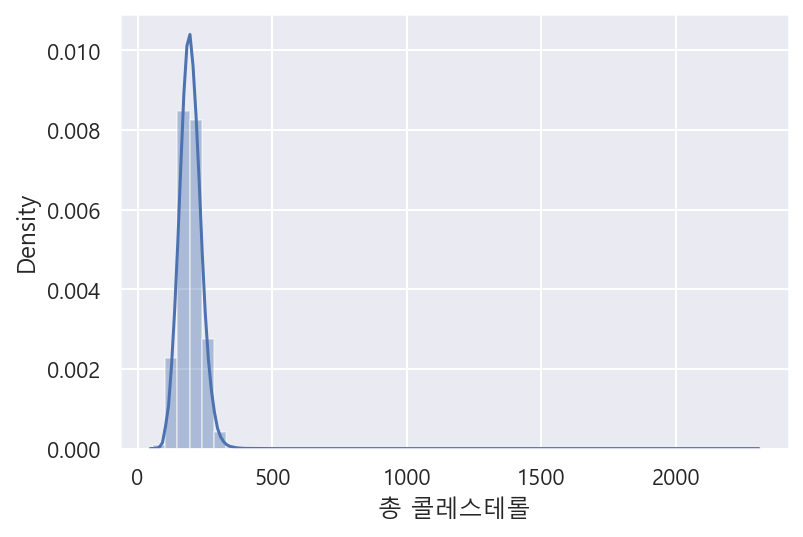

In [73]:
# 총콜레스테롤 에 따른 distplot을 그립니다

sns.distplot(df_col, bins=50)

In [74]:
# 이상치 확인

df_col.describe()

count    129983.000000
mean        196.710124
std          41.650990
min          59.000000
25%         170.000000
50%         195.000000
75%         222.000000
max        2296.000000
Name: 총 콜레스테롤, dtype: float64

C:\Users\COM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

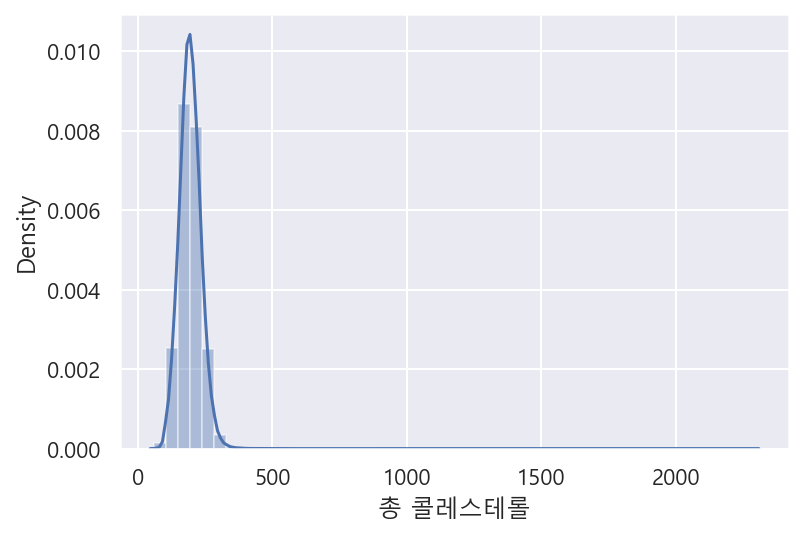

In [75]:
# 음주여부가 1인 값에 대한 총콜레스테롤 을 displot로 그립니다

sns.distplot(df.loc[df["총 콜레스테롤"].notnull() & (df["성별코드"]==1), "총 콜레스테롤"])

C:\Users\COM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

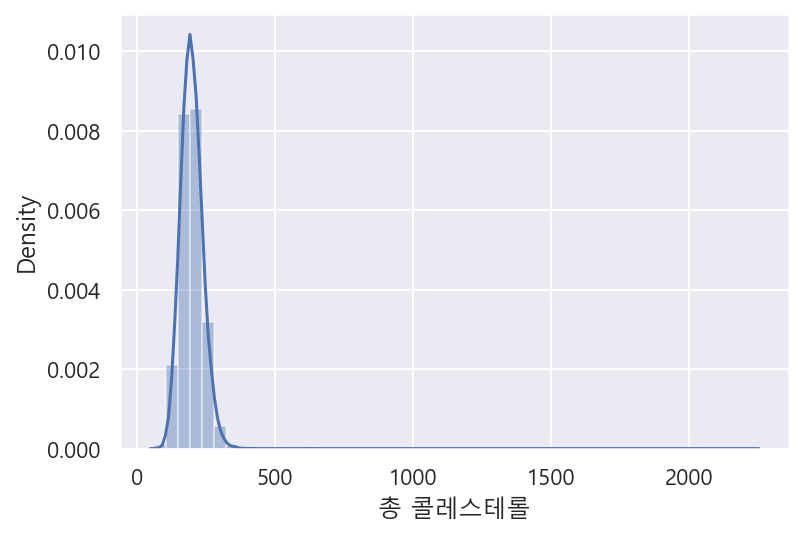

In [76]:
# 음주여부가 0인 값에 대한 "총 콜레스테롤" 을 distplot로 그립니다

sns.distplot(df.loc[df["총 콜레스테롤"].notnull() & df["성별코드"]==0, "총 콜레스테롤"])

C:\Users\COM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\COM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

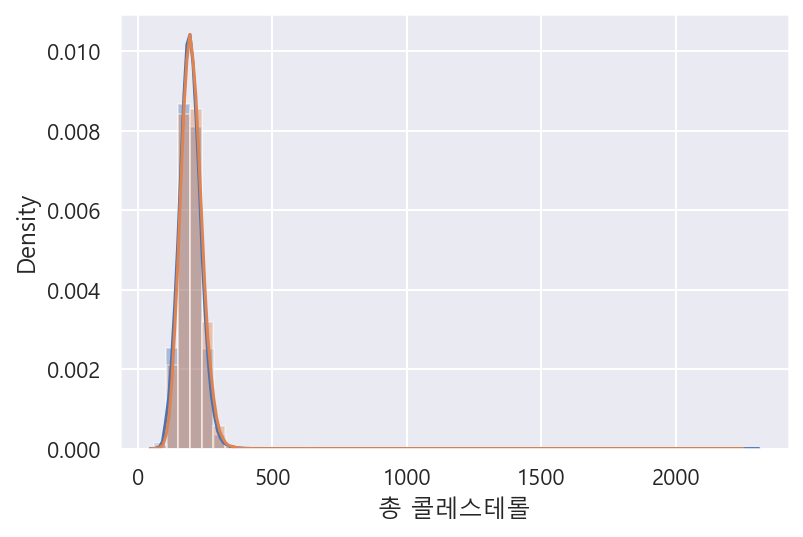

In [77]:
# 음주여부 값에 대한 "총 콜레스테롤" 을 distplot로 그리며 하나의 그래프에 표시되도록 합니다 

sns.distplot(df.loc[df["총 콜레스테롤"].notnull() & (df["성별코드"]==1), "총 콜레스테롤"])
sns.distplot(df.loc[df["총 콜레스테롤"].notnull() & df["성별코드"]==0, "총 콜레스테롤"])

In [78]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다 

# 상관분석

##### r  (-1.0,  -0.7) 강한 음적 선형관계
##### r  (-0.7,  -0.3)  뚜렷한 음적 선형관계
##### r  (-0.3,  -0.1)  약한 음적 선형관계
##### r  (-0.1, +0.1)  거의 무시될 수 있는 선형관계
##### r  (+0.1,  +0.3)  약한 양적 선형관계
##### r  (+0.3,  +0.7)  뚜렷한 양적 선형관계
##### r  (+0.7, +1.0)  강한 양적 선형관계 

In [79]:
# 상관계수에 사용할 컬럼을 변수에 담습니다. 

columns = ['연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']
columns

['연령대 코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '식전혈당(공복혈당)',
 '총 콜레스테롤',
 '트리글리세라이드',
 'HDL 콜레스테롤',
 'LDL 콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마 지티피',
 '흡연상태',
 '음주여부']

## 상관계수 구하기

In [87]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터프레임에 담은 뒤 상관계수를 구합니다

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.383730,-0.181229,0.193430,-0.199924,-0.241452,0.250018,0.253880,0.330729,0.112718,...,-0.046108,-0.050788,-0.180798,-0.023366,0.021736,0.037699,-0.071161,0.010441,-0.090743,NaN
신장(5Cm단위),-0.383730,1.000000,0.676197,0.335936,0.157613,0.203652,-0.112933,-0.107453,-0.001392,0.127109,...,-0.198834,0.022839,0.562689,0.052746,0.285881,0.078727,0.224301,0.090772,0.473917,NaN
체중(5Kg 단위),-0.181229,0.676197,1.000000,0.798629,0.081068,0.093798,-0.041769,-0.049455,0.264872,0.309511,...,-0.344372,0.034482,0.521566,0.043527,0.222731,0.155255,0.406256,0.153243,0.394502,NaN
허리둘레,0.193430,0.335936,0.798629,1.000000,-0.048134,-0.054411,0.105938,0.102481,0.402590,0.349590,...,-0.338879,0.014267,0.384478,0.042923,0.166701,0.165699,0.370534,0.171734,0.307344,NaN
시력(좌),-0.199924,0.157613,0.081068,-0.048134,1.000000,0.344512,-0.083506,-0.090820,-0.077911,0.017322,...,0.039558,0.076944,0.081988,-0.013583,0.002185,-0.005651,0.002752,-0.011638,0.049790,NaN
시력(우),-0.241452,0.203652,0.093798,-0.054411,0.344512,1.000000,0.018874,0.022562,-0.107268,-0.041376,...,0.030196,0.040900,0.102978,-0.013937,0.023988,0.017311,0.043532,-0.023097,0.094247,NaN
청력(좌),0.250018,-0.112933,-0.041769,0.105938,-0.083506,0.018874,1.000000,0.646817,0.111038,0.055947,...,-0.005573,-0.086245,-0.024776,-0.009758,0.002702,-0.039768,-0.059372,-0.031778,-0.004354,NaN
청력(우),0.253880,-0.107453,-0.049455,0.102481,-0.090820,0.022562,0.646817,1.000000,0.071567,0.047621,...,-0.054487,-0.034011,-0.008937,-0.016250,0.036523,-0.015072,-0.048522,-0.032983,-0.030225,NaN
수축기 혈압,0.330729,-0.001392,0.264872,0.402590,-0.077911,-0.107268,0.111038,0.071567,1.000000,0.716615,...,-0.097439,-0.090744,0.169095,-0.004087,0.059220,0.122526,0.165080,0.123572,0.113012,NaN
이완기 혈압,0.112718,0.127109,0.309511,0.349590,0.017322,-0.041376,0.055947,0.047621,0.716615,1.000000,...,-0.078239,-0.072350,0.262492,0.028260,0.101533,0.118165,0.175373,0.155778,0.194204,NaN


In [107]:
# 키에 대한 상관계수를 봅니다. 

df_corr["신장(5Cm단위)"].sort_values(ascending=False)

신장(5Cm단위)       1.000000
체중(5Kg 단위)      0.676197
혈색소             0.562689
흡연상태            0.473917
허리둘레            0.335936
혈청크레아티닌         0.285881
(혈청지오티)ALT      0.224301
시력(우)           0.203652
시력(좌)           0.157613
이완기 혈압          0.127109
감마 지티피          0.090772
(혈청지오티)AST      0.078727
요단백             0.052746
트리글리세라이드        0.042248
LDL 콜레스테롤       0.022839
수축기 혈압         -0.001392
식전혈당(공복혈당)     -0.002710
총 콜레스테롤        -0.044669
청력(우)          -0.107453
청력(좌)          -0.112933
HDL 콜레스테롤      -0.198834
연령대 코드(5세단위)   -0.383730
음주여부                 NaN
Name: 신장(5Cm단위), dtype: float64

In [108]:
# 키에 대한 상관계수를 데이터프레임으로 봅니다

df_corr[["신장(5Cm단위)"]]

,신장(5Cm단위)
연령대 코드(5세단위),-0.383730
신장(5Cm단위),1.000000
체중(5Kg 단위),0.676197
허리둘레,0.335936
시력(좌),0.157613
시력(우),0.203652
청력(좌),-0.112933
청력(우),-0.107453
수축기 혈압,-0.001392
이완기 혈압,0.127109


In [114]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.676197
허리둘레          0.335936
혈색소           0.562689
흡연상태          0.473917
Name: 신장(5Cm단위), dtype: float64

In [117]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다

df_corr.loc[df_corr["음주여부"] > 0.1, "음주여부"]

Series([], Name: 음주여부, dtype: float64)

In [118]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다

df_corr.loc[df_corr["혈색소"] > 0.3, "혈색소"]

신장(5Cm단위)     0.562689
체중(5Kg 단위)    0.521566
허리둘레          0.384478
혈색소           1.000000
(혈청지오티)ALT    0.301588
흡연상태          0.465680
Name: 혈색소, dtype: float64

In [121]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다

df_corr.loc[df_corr["감마 지티피"] > 0.3, "감마 지티피"]

(혈청지오티)AST    0.577641
(혈청지오티)ALT    0.379755
감마 지티피        1.000000
Name: 감마 지티피, dtype: float64

## heatmap

<AxesSubplot:>

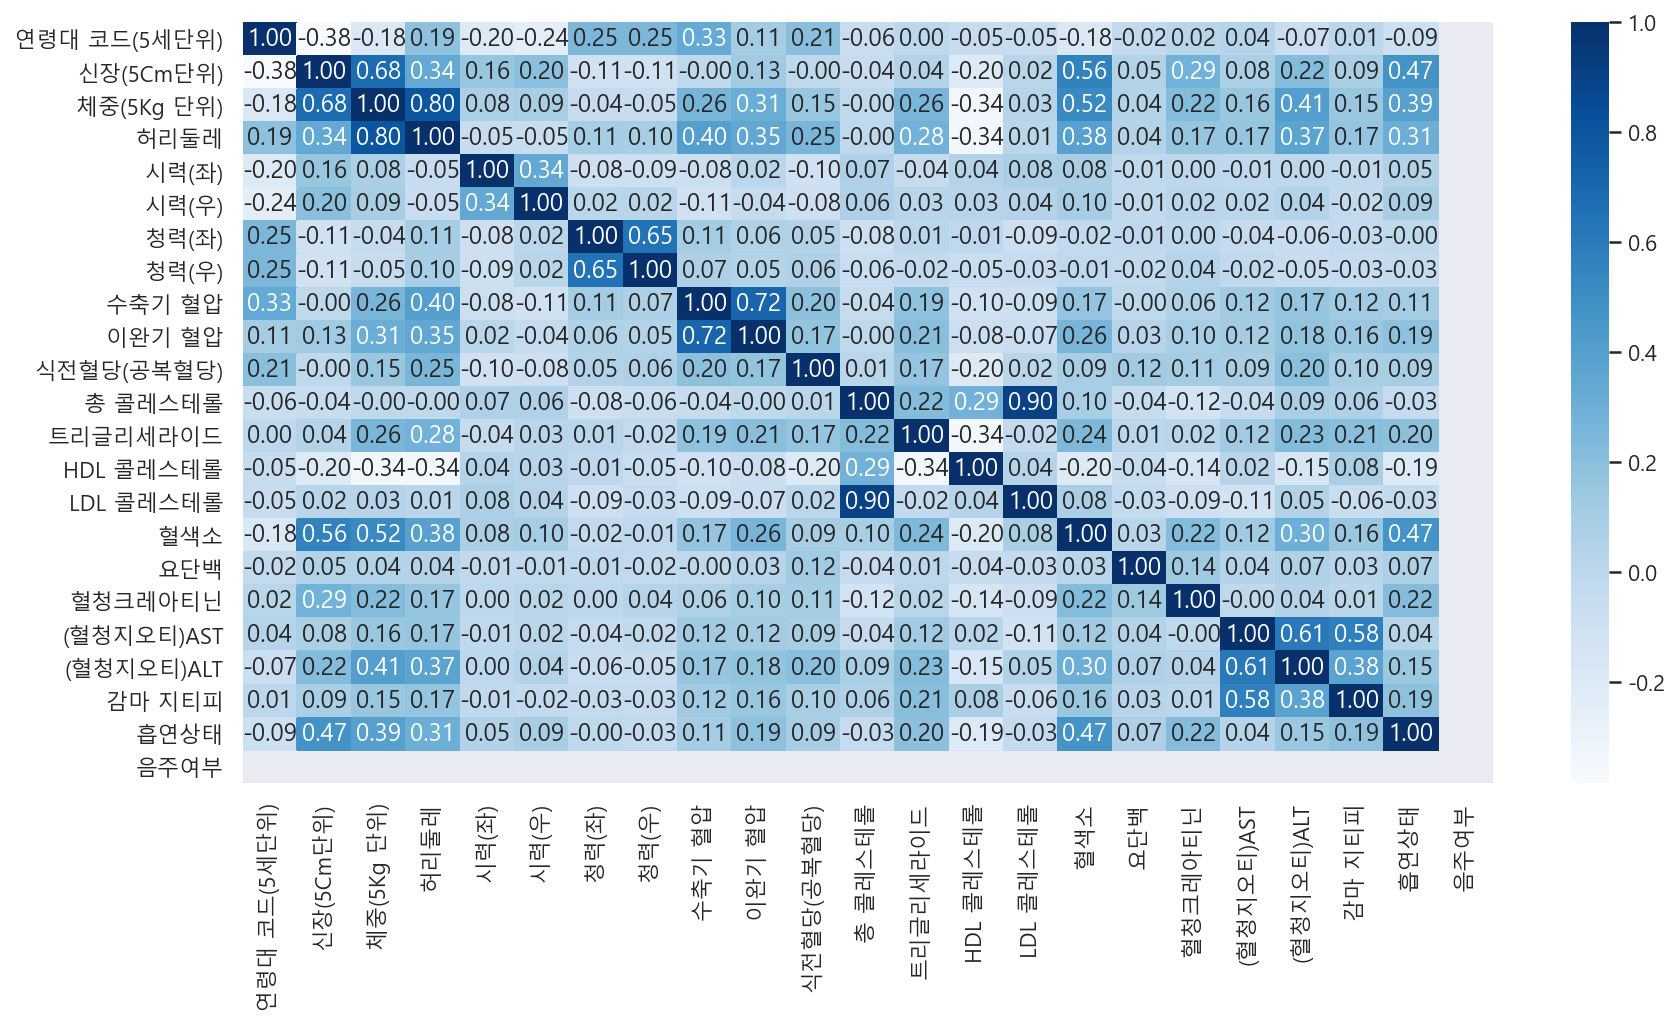

In [127]:
# 위에서 구한 상관계수를 heatmap를 통해 표현해 봅니다

plt.figure(figsize=(14,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

In [ ]:
mask = np.triu